# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [2]:
from detect_peaks import detect_peaks
import ruptures as rpt

# Load Dataset

In [3]:
%run load_dataset.ipynb

In [4]:
subj_range = np.hstack((np.arange(1001,1013),np.arange(2002,2003)))

all_subjects = [str(i) for i in subj_range]
all_normal = all_subjects

In [5]:
subj_range = np.hstack((np.arange(2001,2002),np.arange(3001,3006)))

all_patients = [str(i) for i in subj_range]

In [11]:
print(all_subjects)
print(all_patients)

all_people = ['1001','1002','1003','1004','1005','1006','1007','1008','1009','1010','1011','1012','1013','1014',]

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '2002']
['2001', '3001', '3002', '3003', '3004', '3005']


In [12]:
# X_all, y_all, subj_all, ts_all, hr_all = load_all_data(all_subjects)

In [13]:
X_all_p, y_all_p, subj_all_p, ts_all_p, hr_all_p = load_all_data(all_people)

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 1013's data
Loading 1014's data
Finished loading


In [14]:
X_all_p.shape

(28898, 3)

# Data Preprocessing

In [16]:
%run preprocessing.ipynb

# Group Data by Label and Normalize Data

In [18]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [19]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [20]:
# # group X_all and y_all from load_dataset.ipynb by labels
# X_label, y_label = label_grouping(X_all, y_all, subj_all, all_subjects, new_label_list)

# # normalize X_label
# X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

In [21]:
# plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [22]:
# roll, pitch, yaw = calc_rpy(X_all, colors)
# rpy = np.array([roll, pitch, yaw]).transpose()

# print(rpy.shape, y_all.shape)

In [23]:
roll, pitch, yaw = calc_rpy(X_all_p, colors)
rpy_p = np.array([roll, pitch, yaw]).transpose()

print(rpy_p.shape, y_all_p.shape)

(28898, 3) (28898,)


# Apply PCA

In [25]:
# apply PCA to X_all and rpy
# X_pca, pca = apply_pca(X_all, y_all, label_list)
# rpy_pca, pca = apply_pca(rpy, y_all, label_list)

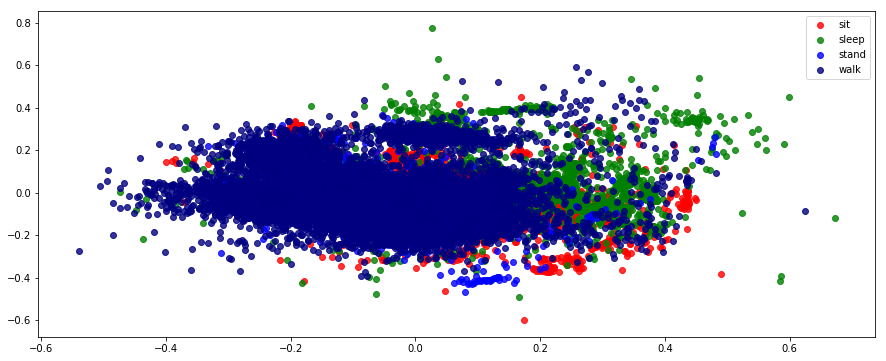

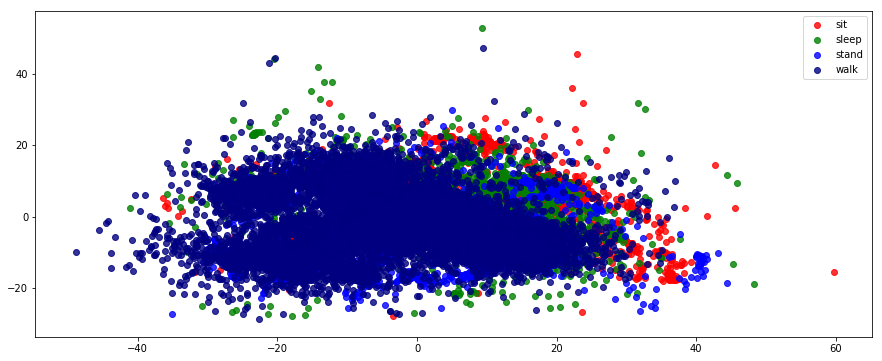

In [26]:
# apply PCA and LDA to X_all and rpy
X_pca_p, pca_p = apply_pca(X_all_p, y_all_p, label_list)
rpy_pca_p, pca_p = apply_pca(rpy_p, y_all_p, label_list)

# Reshape Data (Pure Label)

In [27]:
# print(rpy_pca_p.shape, y_all_p.shape, subj_all_p.shape)

In [30]:
# get label-separated X and y
X_pure, y_pure = prepare_pure_label(X_pca_p, y_all_p, subj_all_p, all_people, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

In [31]:
print(X_pure.shape, y_pure.shape)

(25594, 180) (25594,)


# Reshape Data (Impure Label)

In [32]:
X_impure, y_impure = prepare_impure_label(X_pca_p, y_all_p)

In [33]:
print(X_impure.shape, y_impure.shape)

(28839, 180) (28839,)


# Split Train and Test Set

In [34]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pure, y_pure, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(23071, 180)
(5768, 180)


In [35]:
print(X_train.shape)
print(X_test.shape)

(20475, 180)
(5119, 180)


# Find proper thresholds of walk activity

## Patients

In [38]:
X_dict = {
    'id': subj_all_p,
    'x': [X_i[0] for X_i in X_all_p],
    'y': [X_i[1] for X_i in X_all_p],
    'z': [X_i[2] for X_i in X_all_p],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca_p],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca_p],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca_p],
    'label': y_all_p
}

df_rpy = pd.DataFrame(X_dict)

all_subjects = all_people

In [39]:
# X_dict = {
#     'id': subj_all,
#     'x': [X_i[0] for X_i in X_all],
#     'y': [X_i[1] for X_i in X_all],
#     'z': [X_i[2] for X_i in X_all],
#     'x_pca': [X_i_pca[0] for X_i_pca in X_pca],
#     'y_pca': [X_i_pca[1] for X_i_pca in X_pca],
#     'z_pca': [X_i_pca[2] for X_i_pca in X_pca],
#     'label': y_all
# }

# df_rpy = pd.DataFrame(X_dict)

# all_subjects = all_normal

In [40]:
df_rpy

id         x         y         z     x_pca     y_pca     z_pca  label
0      1001  0.232240  0.684961  0.471288 -0.199743  0.230650  0.070429      2
1      1001  0.231985  0.686028  0.469237 -0.200899  0.230381  0.068429      2
2      1001  0.232240  0.686242  0.470903 -0.200001  0.231454  0.069393      2
3      1001  0.232751  0.686135  0.470903 -0.199529  0.231273  0.069267      2
4      1001  0.232751  0.685495  0.471928 -0.199059  0.231346  0.070378      2
5      1001  0.233091  0.686562  0.471288 -0.199096  0.231769  0.069160      2
6      1001  0.232240  0.686775  0.472441 -0.199413  0.232758  0.070171      2
7      1001  0.232240  0.686028  0.471288 -0.199827  0.231503  0.069794      2
8      1001  0.229858  0.685068  0.473979 -0.200814  0.232718  0.073169      2
9      1001  0.230368  0.685068  0.468211 -0.202713  0.229333  0.068872      2
10     1001  0.231730  0.686988  0.472954 -0.199683  0.233317  0.070599      2
11     1001  0.231134  0.685495  0.471928 -0.200528  0.231650  0.070980      2
12     1001  0.233346  0.687628  0.469621 -0.199630  0.231624  0.067243      2
13     1001  0.233601  0.676747  0.471288 -0.197862  0.223825  0.074812      2
14     1001  0.232921  0.679201  0.467186 -0.200354  0.223576  0.070684      2
15     1001  0.231730  0.688908  0.468468 -0.201672  0.232294  0.066262      2
16     1001  0.232410  0.688162  0.467570 -0.201363  0.231058  0.065814      2
17     1001  0.231985  0.685175  0.467570 -0.201515  0.228749  0.067750      2
18     1001  0.231645  0.685495  0.465776 -0.202585  0.228046  0.066409      2
19     1001  0.230198  0.687308  0.466545 -0.203726  0.230206  0.066415      2
20     1001  0.234537  0.685388  0.467699 -0.199160  0.228513  0.066764      2
21     1001  0.231645  0.683148  0.463725 -0.203241  0.224999  0.066345      2
22     1001  0.228412  0.684321  0.469109 -0.204066  0.229615  0.070684      2
23     1001  0.231559  0.685495  0.460264 -0.204920  0.224919  0.062516      2
24     1001  0.232155  0.680908  0.464879 -0.202129  0.223770  0.068310      2
25     1001  0.233942  0.686348  0.463469 -0.201509  0.226981  0.063403      2
26     1001  0.229007  0.689869  0.465648 -0.205377  0.231966  0.064696      2
27     1001  0.230539  0.687202  0.462956 -0.204879  0.228011  0.063797      2
28     1001  0.231219  0.686882  0.464238 -0.203710  0.228358  0.064646      2
29     1001  0.233601  0.689762  0.462699 -0.202401  0.229336  0.060950      2
...     ...       ...       ...       ...       ...       ...       ...    ...
28868  1014  0.644481  0.523161  0.307035  0.120303 -0.069926 -0.103713      3
28869  1014  0.788456  0.519867  0.278978  0.239916 -0.115635 -0.175340      3
28870  1014  0.545002  0.451023  0.276182  0.022906 -0.126497 -0.045701      3
28871  1014  0.596090  0.488245  0.313263  0.081612 -0.085197 -0.060477      3
28872  1014  0.651223  0.435377  0.345164  0.148934 -0.119655 -0.026820      3
28873  1014  0.718641  0.479845  0.296232  0.186671 -0.124673 -0.113236      3
28874  1014  0.592344  0.486433  0.291179  0.069302 -0.098532 -0.073728      3
28875  1014  0.598037  0.530572  0.287748  0.069610 -0.066262 -0.104565      3
28876  1014  0.611072  0.531889  0.298901  0.085922 -0.061300 -0.102261      3
28877  1014  0.556538  0.529913  0.330929  0.049637 -0.034363 -0.057973      3
28878  1014  0.719989  0.552147  0.334615  0.197955 -0.045221 -0.129445      3
28879  1014  0.596989  0.490880  0.285079  0.070675 -0.099328 -0.082448      3
28880  1014  0.578112  0.464034  0.269446  0.049218 -0.126160 -0.070571      3
28881  1014  0.610622  0.511467  0.293849  0.085044 -0.080428 -0.093535      3
28882  1014  0.652122  0.478034  0.300807  0.128233 -0.111002 -0.084131      3
28883  1014  0.654519  0.464199  0.295977  0.129517 -0.125271 -0.080227      3
28884  1014  0.614667  0.457117  0.290163  0.091471 -0.126755 -0.065313      3
28885  1014  0.602082  0.484951  0.270844  0.069936 -0.113144 -0.090952      3
28886  1014  0.558186  0.504714  0.304366  0.042227 -0.0699

In [41]:
df_walk = df_rpy[df_rpy['label']==label_dict['walk']]
df_walk = df_walk.reset_index(drop=True)

In [42]:
df_nonwalk = df_rpy[df_rpy['label']!=label_dict['walk']]
df_nonwalk = df_nonwalk.reset_index(drop=True)

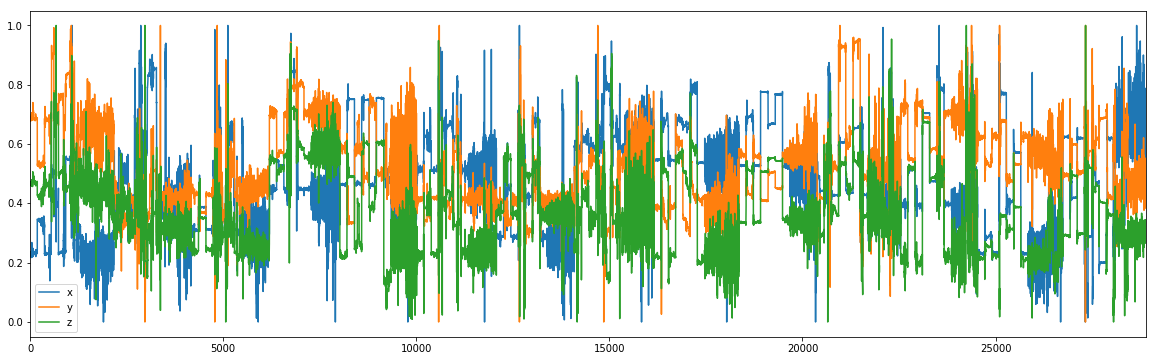

In [43]:
cols = ['x','y','z']

df_rpy[cols].plot(figsize=(20,6))
plt.show()

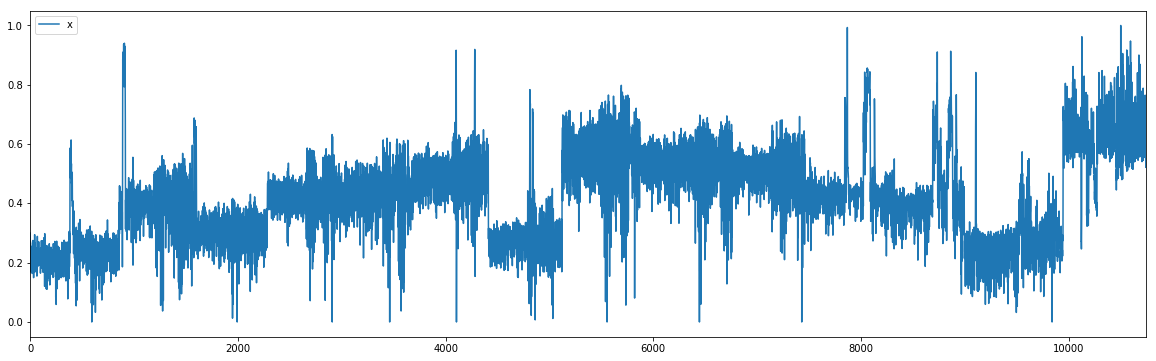

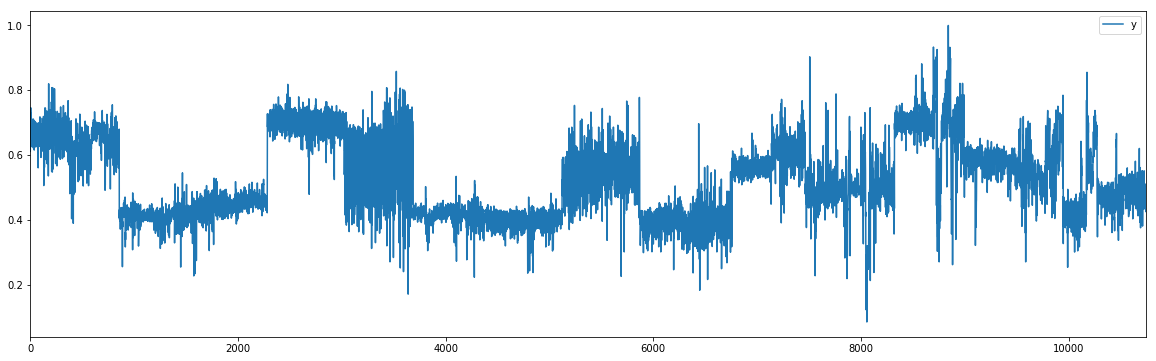

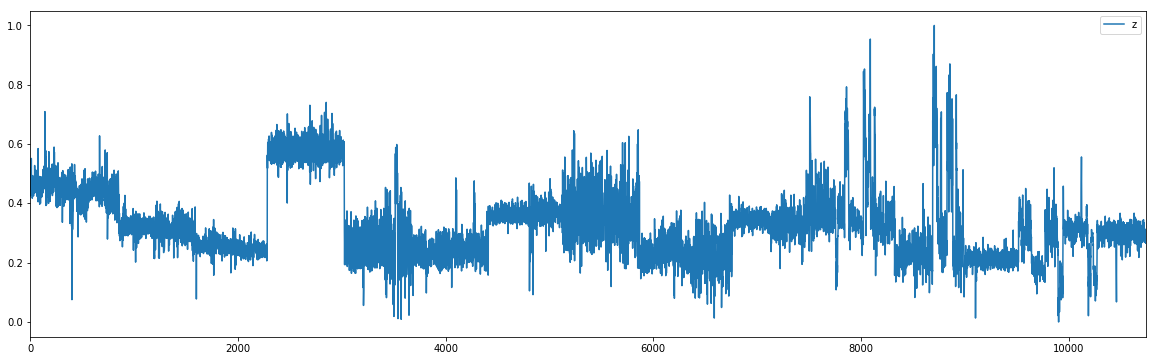

In [44]:
cols = ['x','y','z']

f, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(10,15))

for i, c in cols:
    ax[i] = df_walk[c].plot(figsize=(10,4), ax=ax)
    ax[i].legend(c)
    
    plt.show()

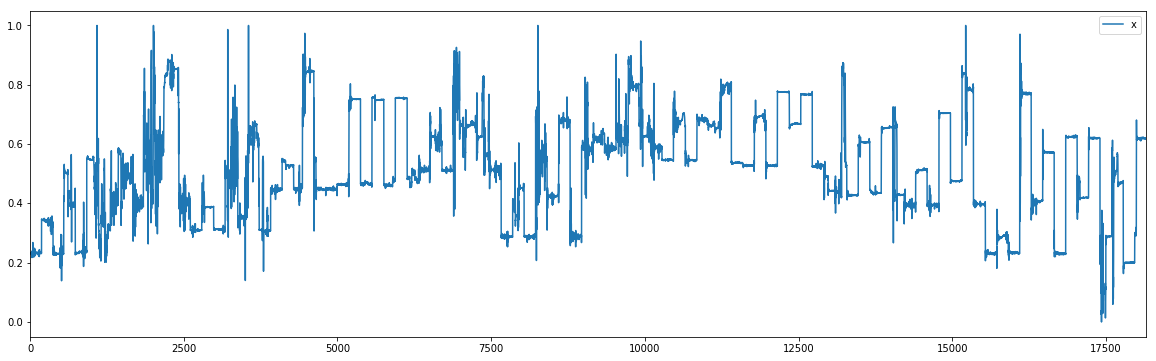

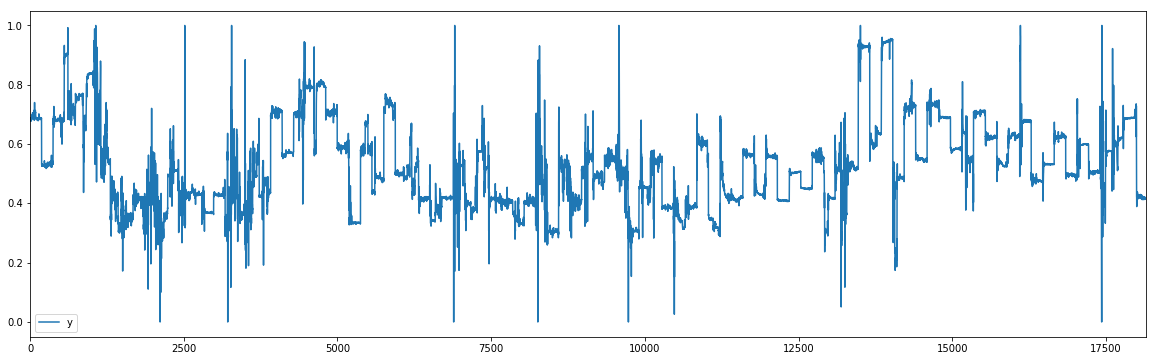

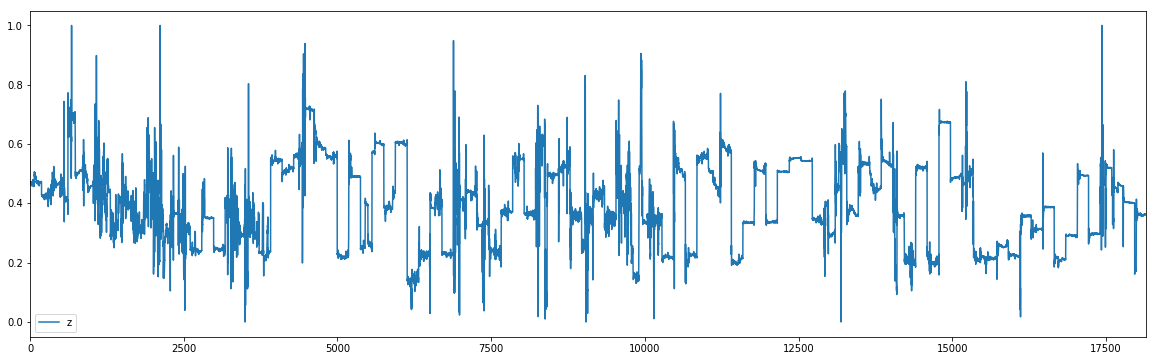

In [45]:
cols = ['x','y','z']

for c in cols:
    f, ax = plt.subplots()
    df_nonwalk[c].plot(figsize=(20,6), ax=ax)
    ax.legend(c)
    
    plt.show()

1001


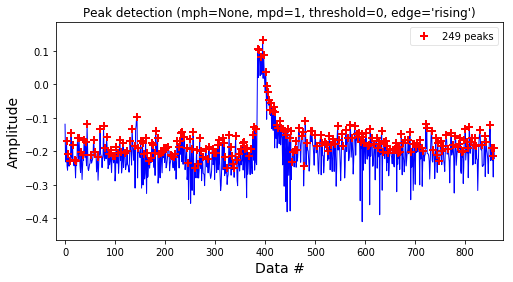

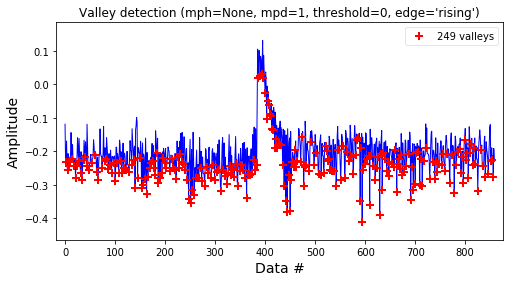

x_pca 0.06350933393999506


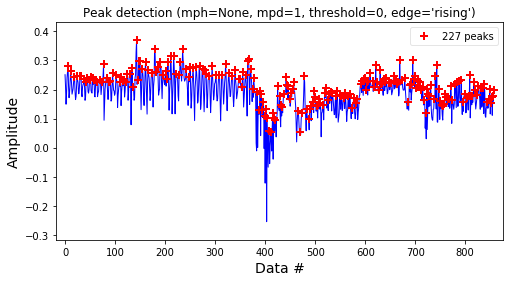

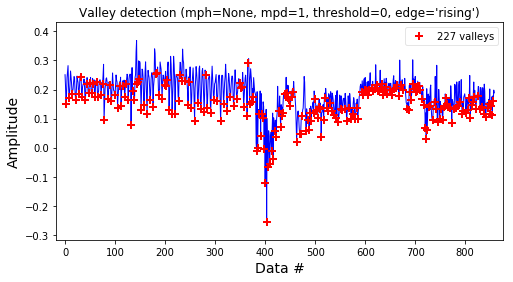

y_pca 0.05730741860952929


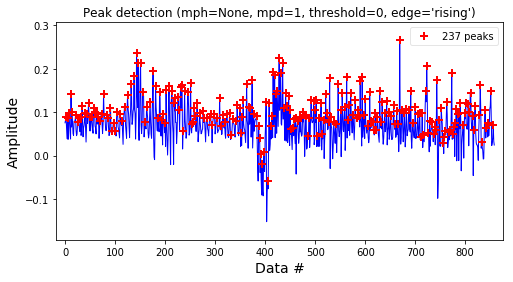

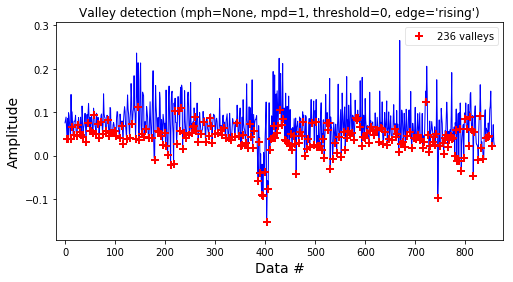

z_pca 0.056095794889123494
1002


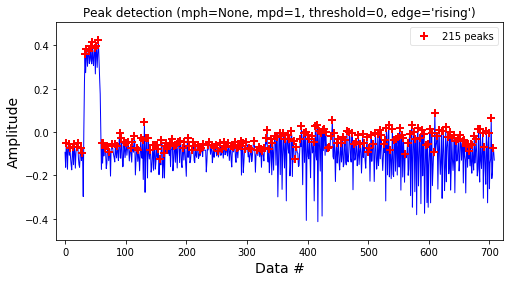

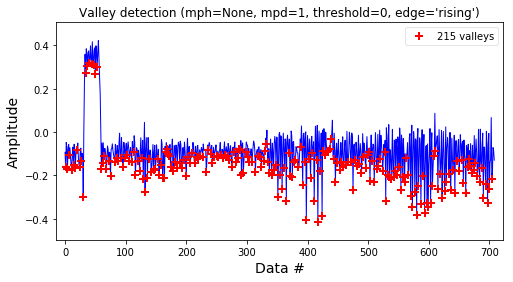

x_pca 0.114518772303702


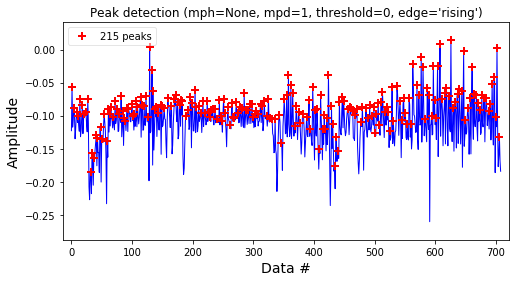

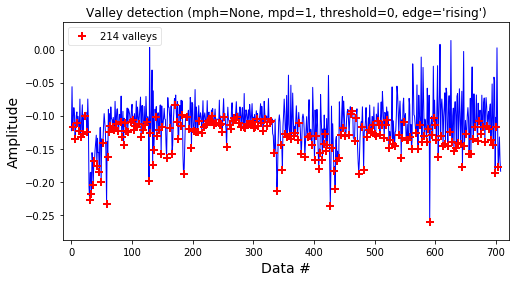

y_pca 0.03751202830211393


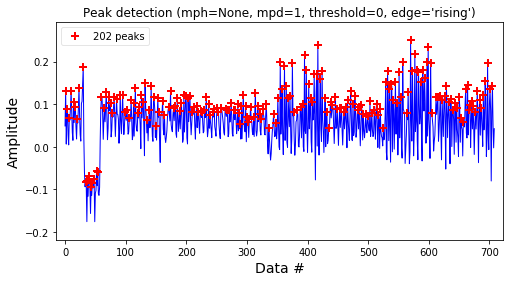

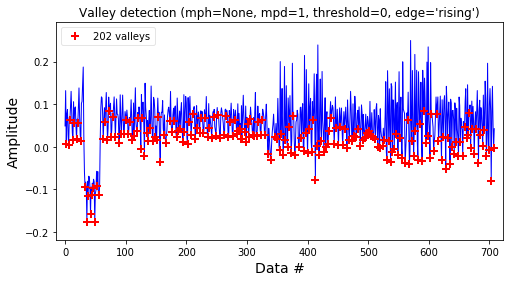

z_pca 0.08658032049924222
1003


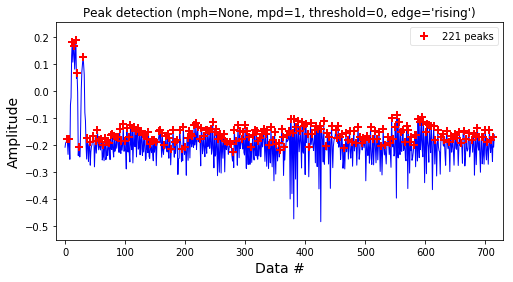

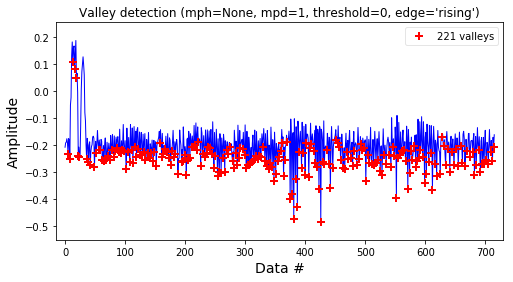

x_pca 0.08794737171608558


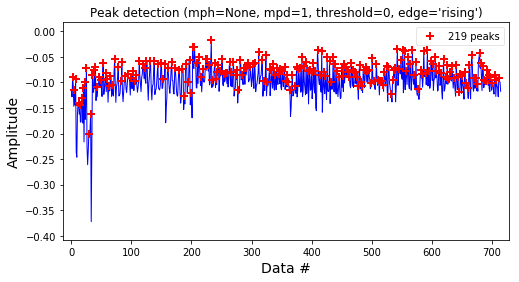

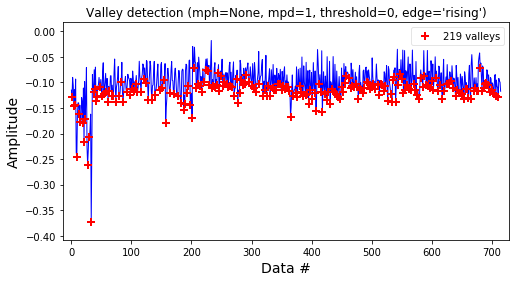

y_pca 0.03702668702330353


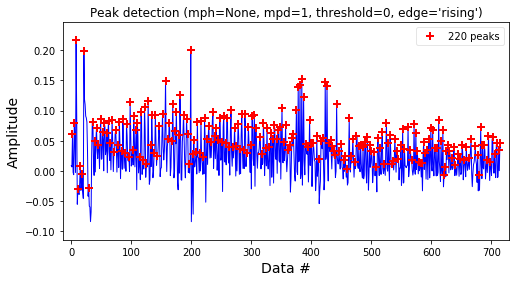

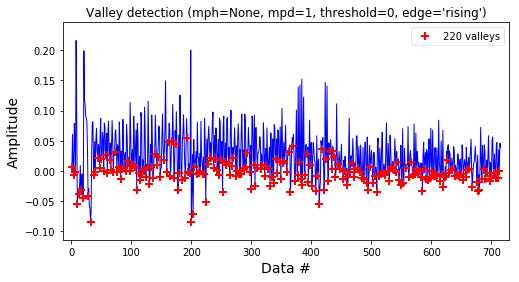

z_pca 0.05097686270787047
1004


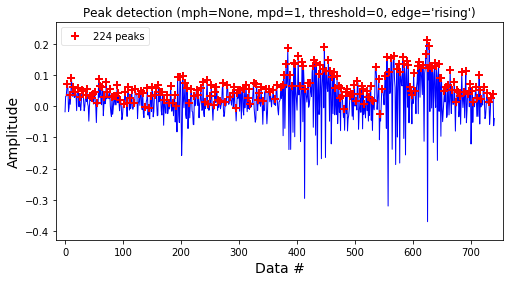

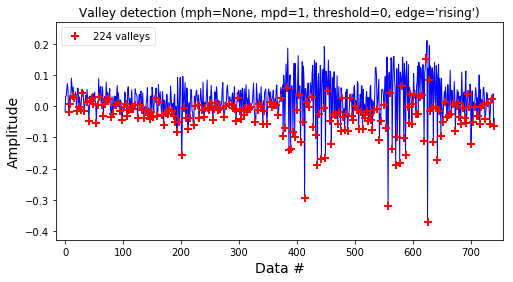

x_pca 0.0741102550440793


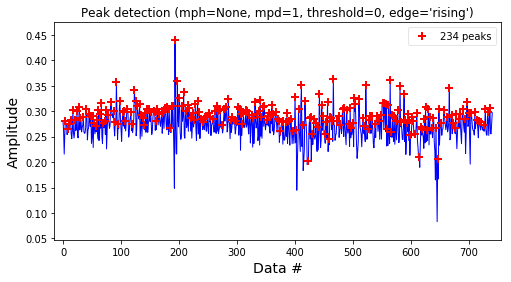

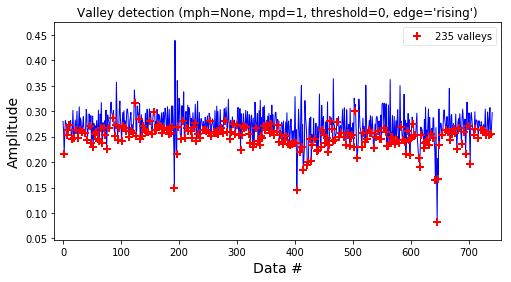

y_pca 0.0418423568743589


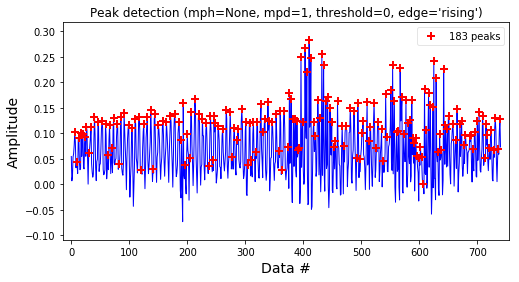

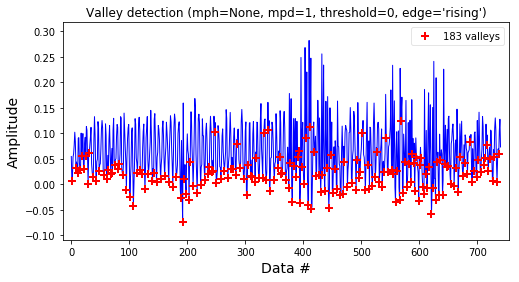

z_pca 0.09787754803316413
1005


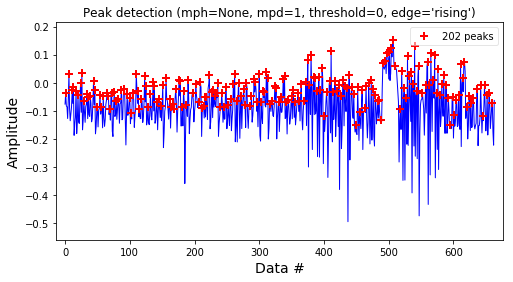

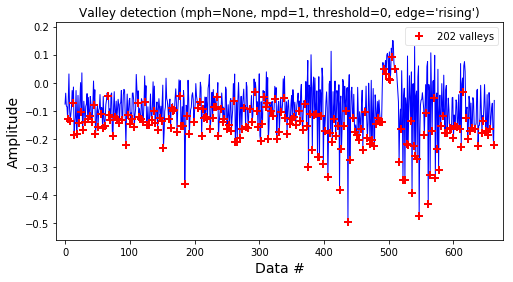

x_pca 0.10379613404543742


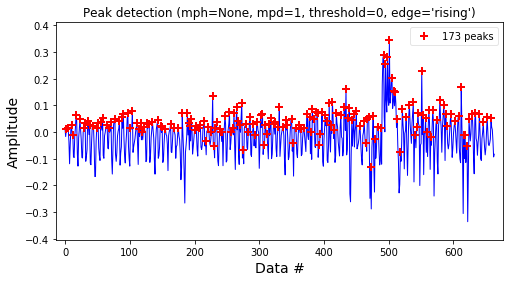

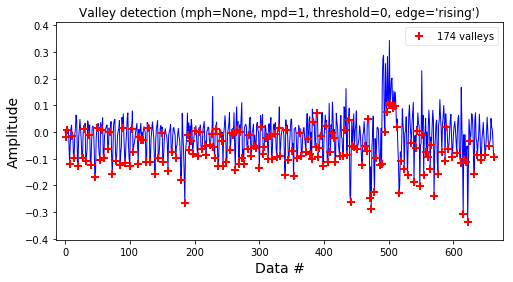

y_pca 0.11616535018442764


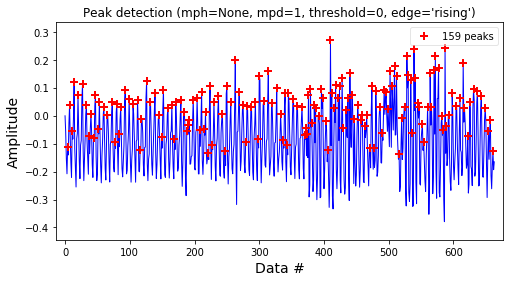

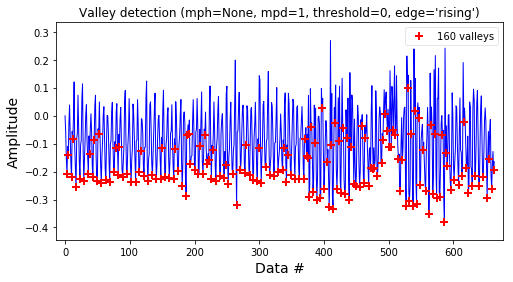

z_pca 0.22348857039463152
1006


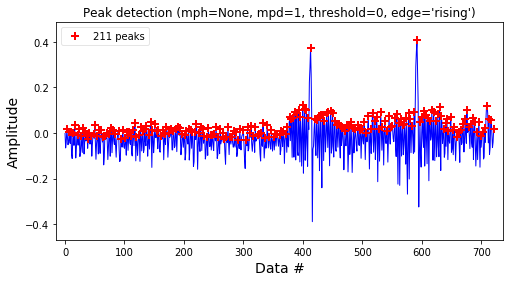

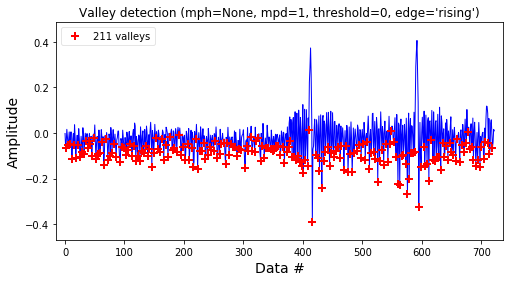

x_pca 0.10682884745224183


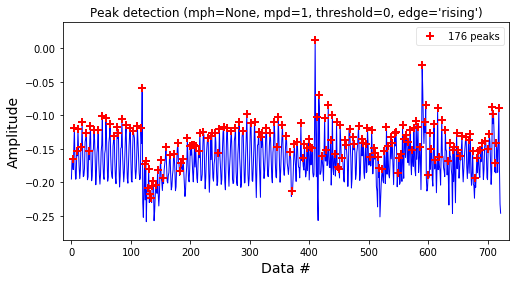

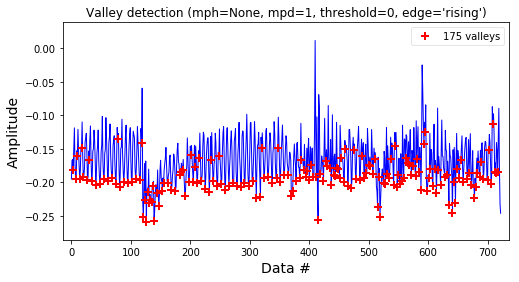

y_pca 0.05525743447360562


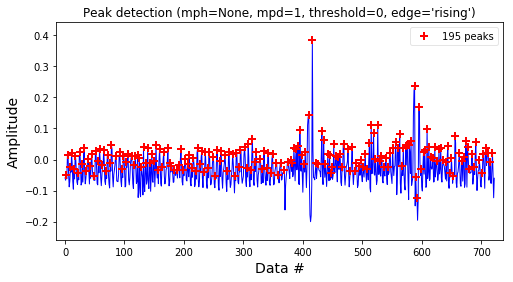

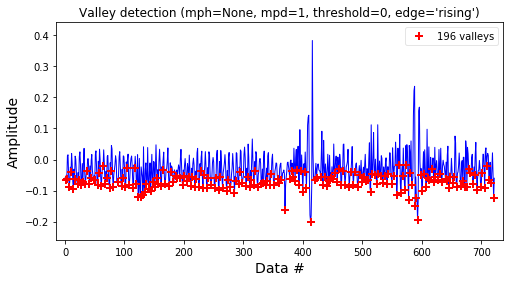

z_pca 0.07422498524871327
1007


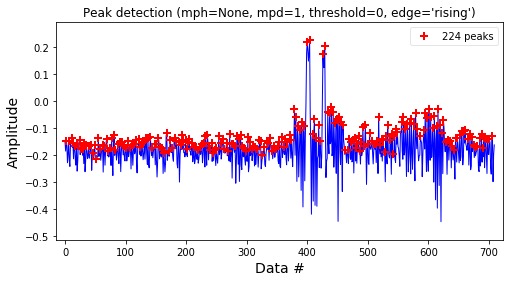

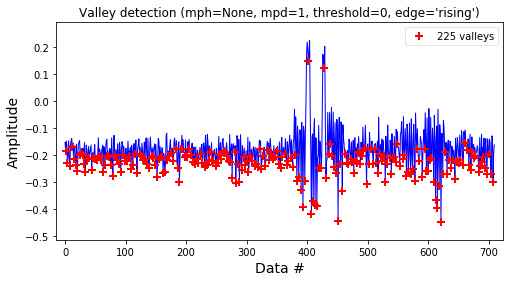

x_pca 0.07858780022313461


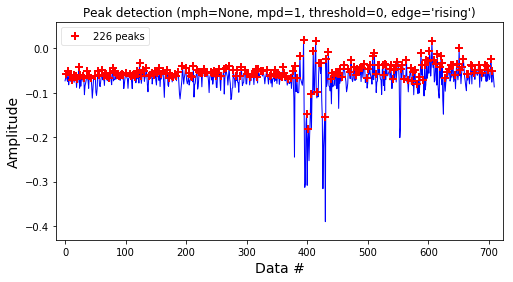

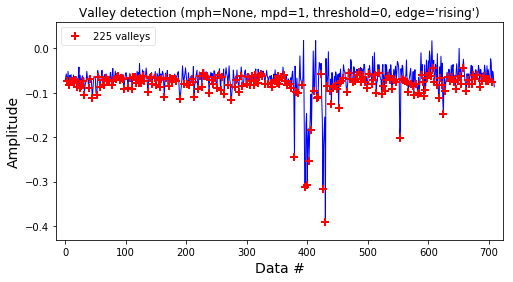

y_pca 0.02484254757559424


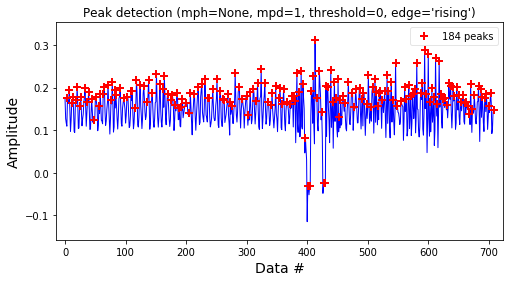

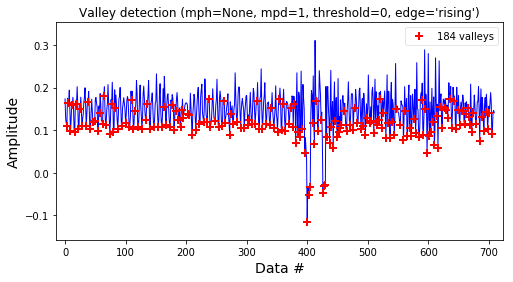

z_pca 0.06557958178783252
1008


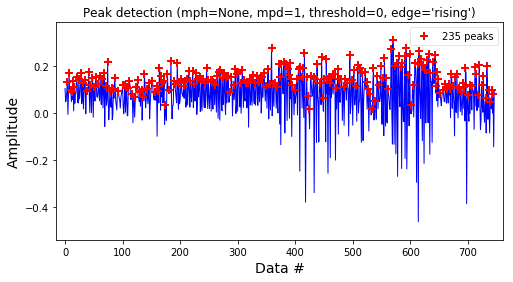

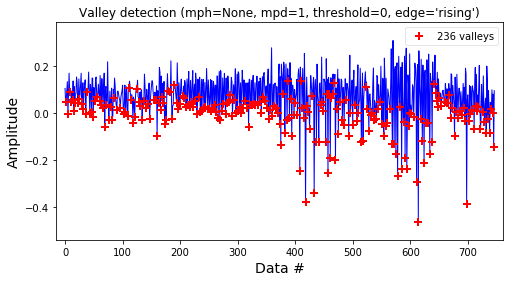

x_pca 0.12652154871696114


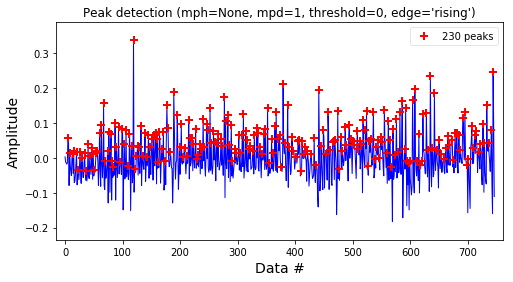

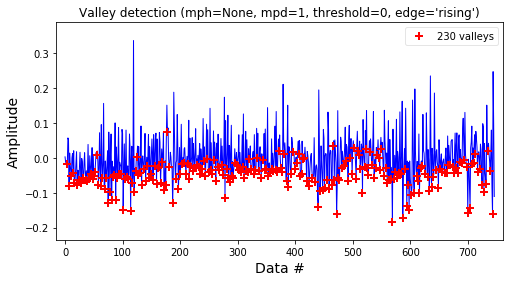

y_pca 0.0915675170754551


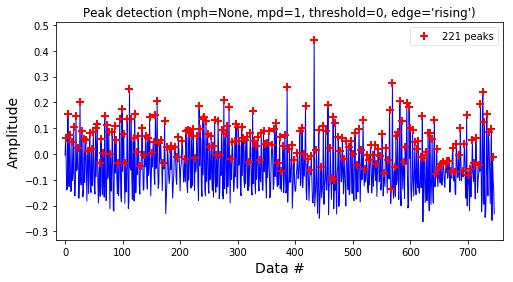

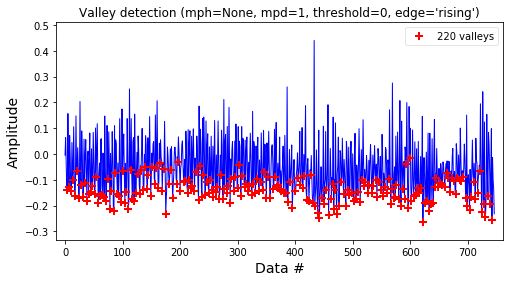

z_pca 0.19978853064116603
1009


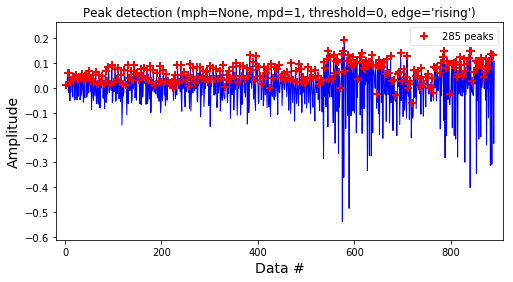

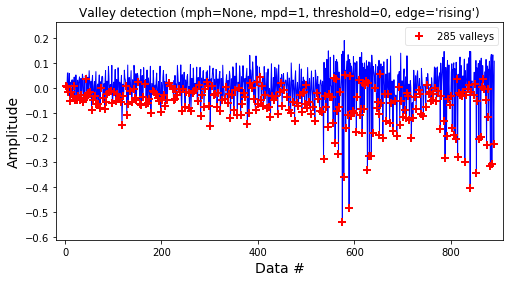

x_pca 0.10976937907324069


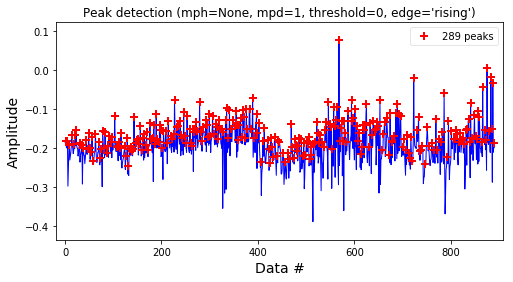

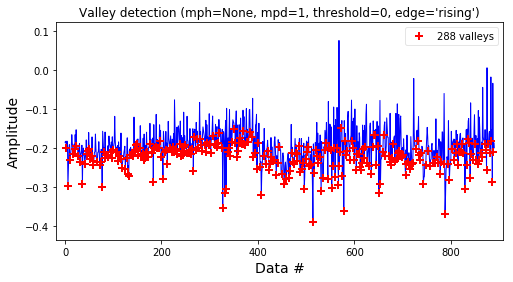

y_pca 0.05117576163190593


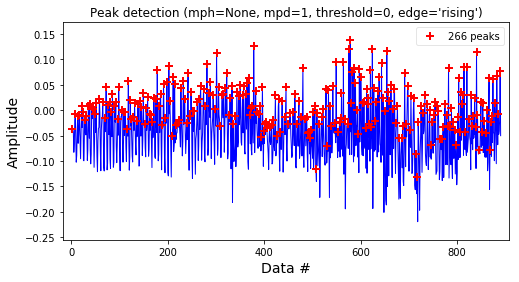

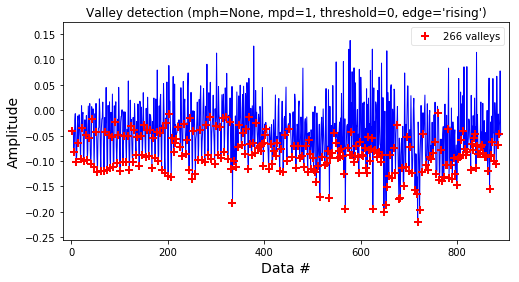

z_pca 0.09187727462072773
1010


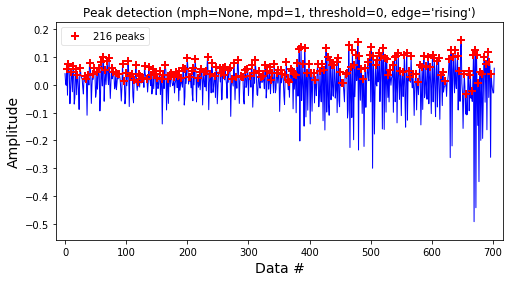

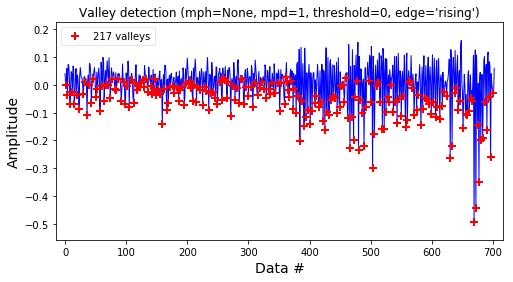

x_pca 0.10769275149858121


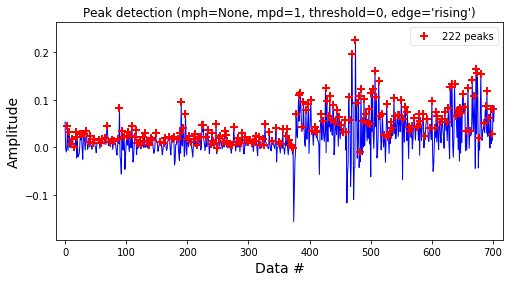

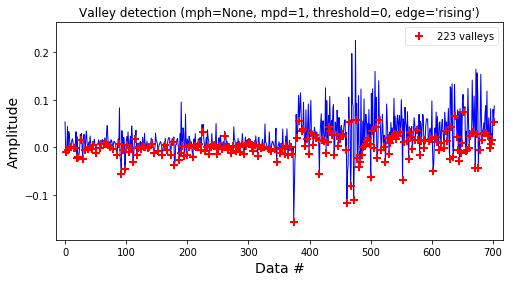

y_pca 0.03675516498904703


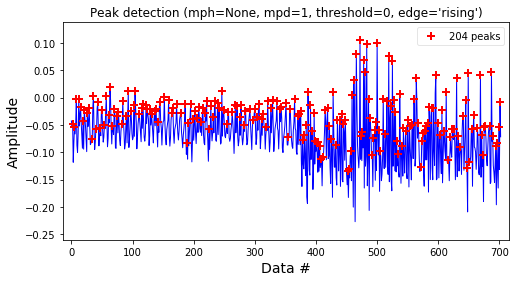

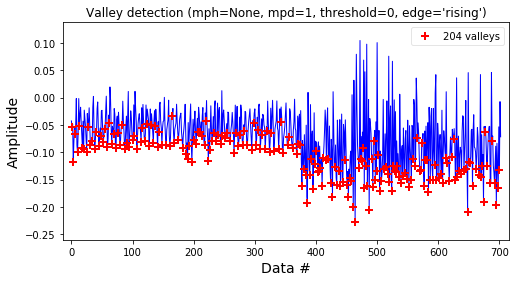

z_pca 0.0640407706902636
1011


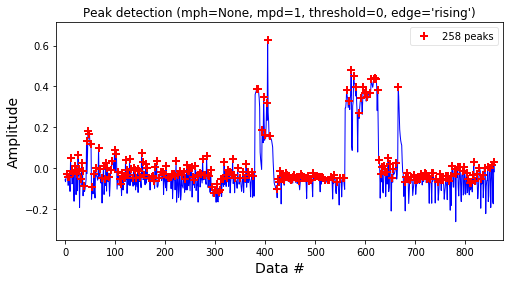

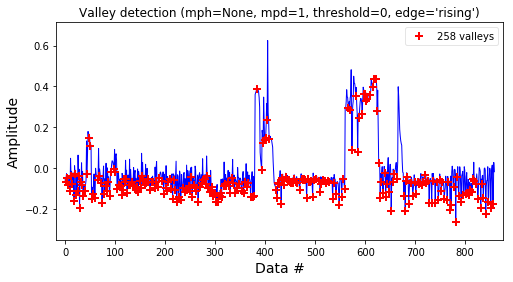

x_pca 0.06576492852069982


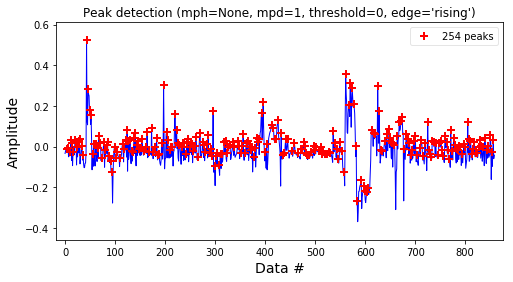

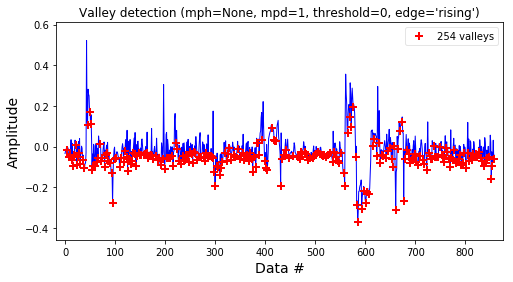

y_pca 0.05761658067997108


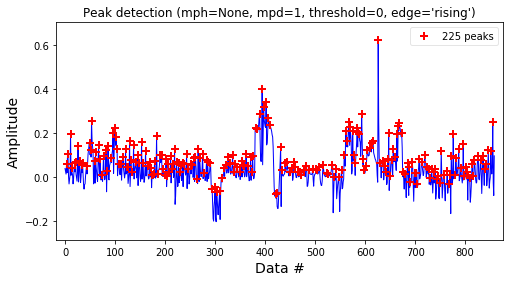

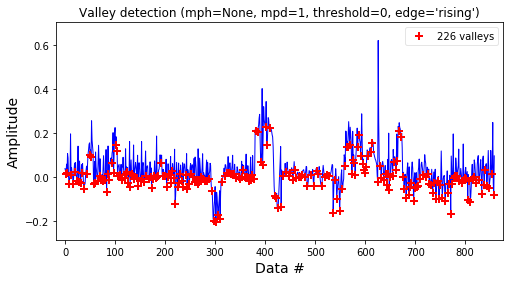

z_pca 0.07600569223303007
1012


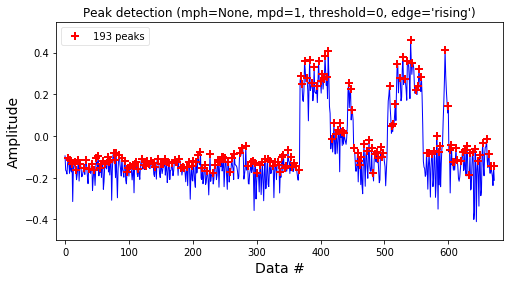

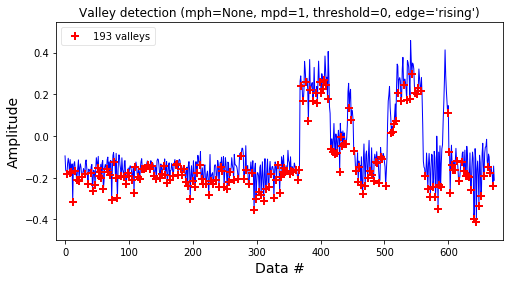

x_pca 0.07857734466890559


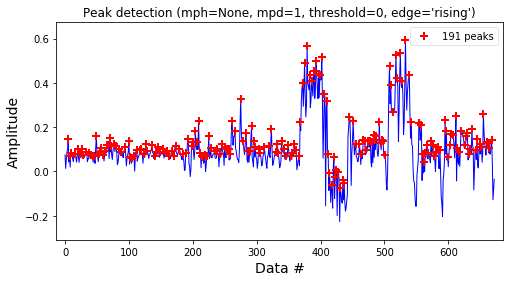

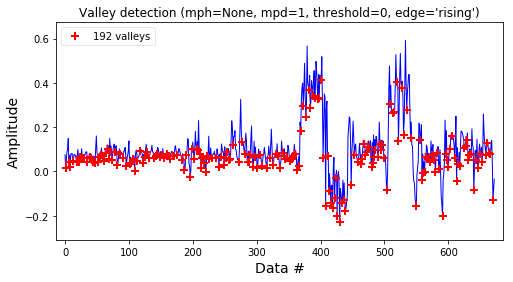

y_pca 0.05336415483131618


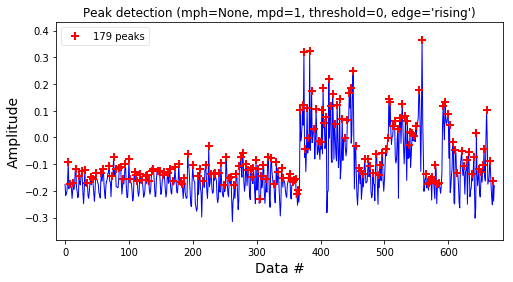

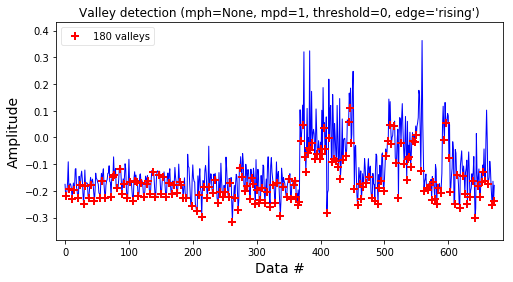

z_pca 0.08588148543914337
1013


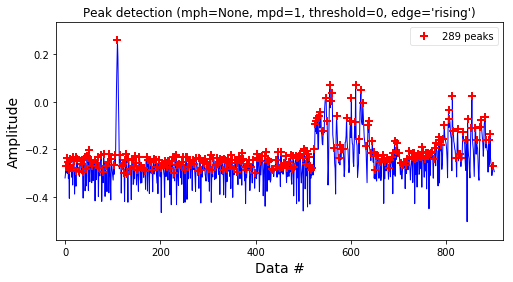

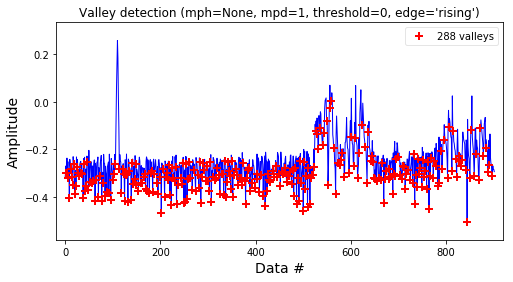

x_pca 0.07537201656975714


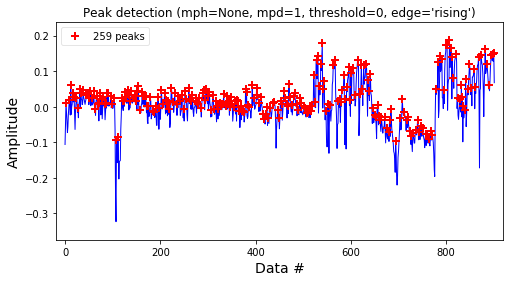

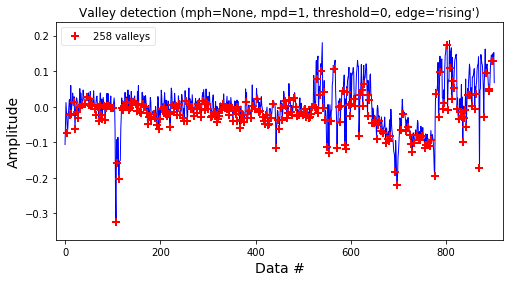

y_pca 0.03402884395196039


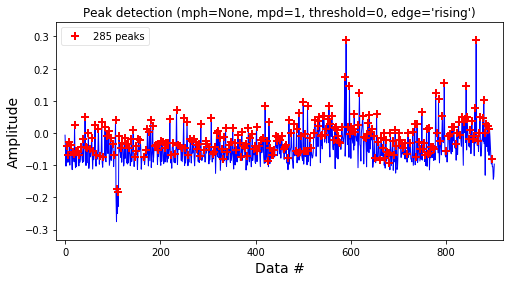

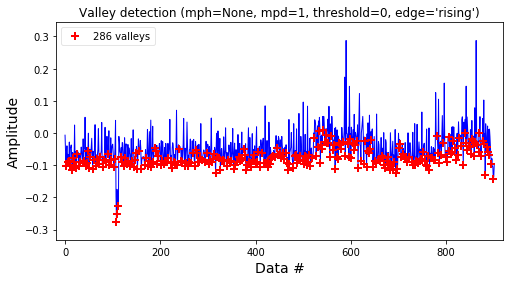

z_pca 0.057568808085732545
1014


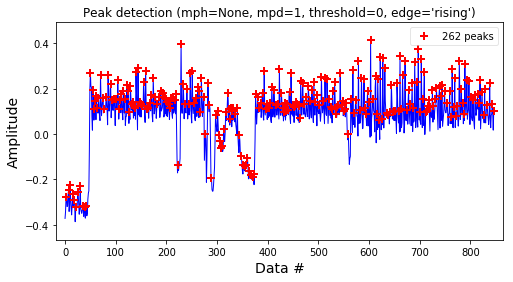

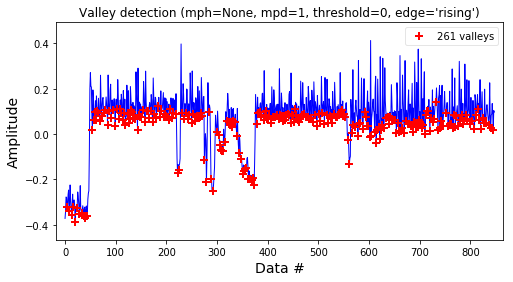

x_pca 0.08860738752668734


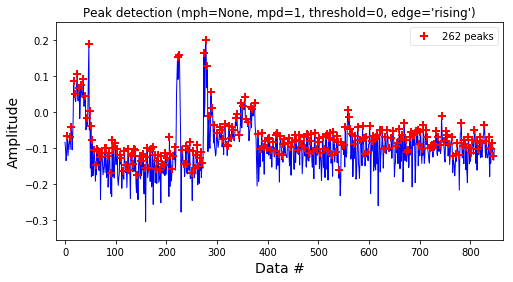

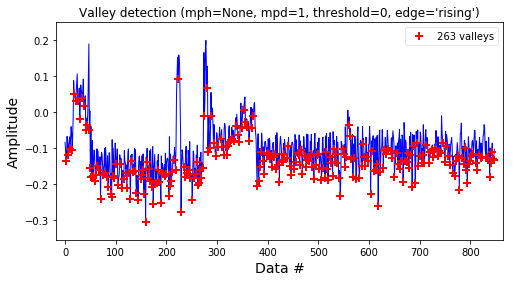

y_pca 0.05267868355117052


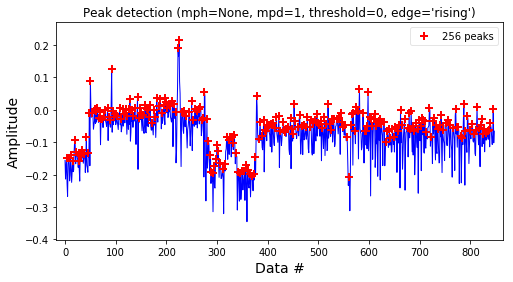

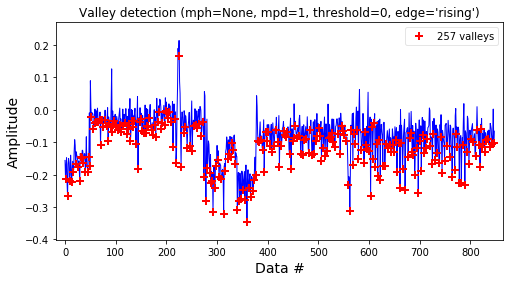

z_pca 0.062305939034237784


In [64]:
cols = ['x_pca', 'y_pca', 'z_pca']
# cols = ['x','y','z']

all_avg_diff = [[],[],[]]

for subj_i in all_subjects:
    df_walk_i = df_walk[df_walk['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.median(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff[i].append(avg_diff_pv)
        
all_avg_diff = np.array(all_avg_diff)

1001


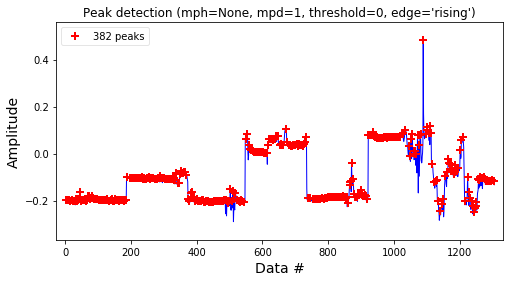

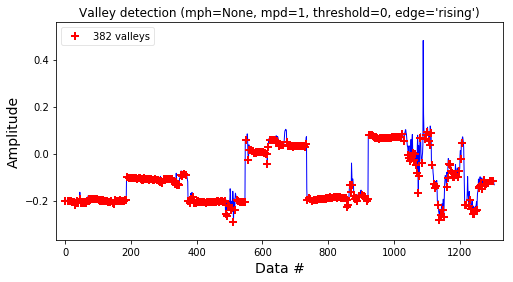

x_pca 0.003914074013583235


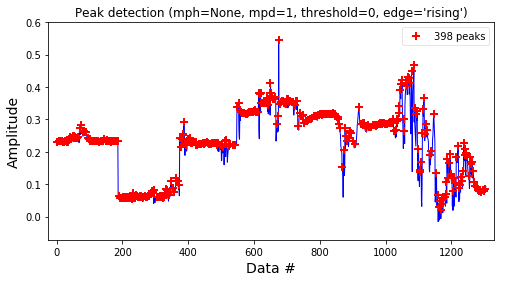

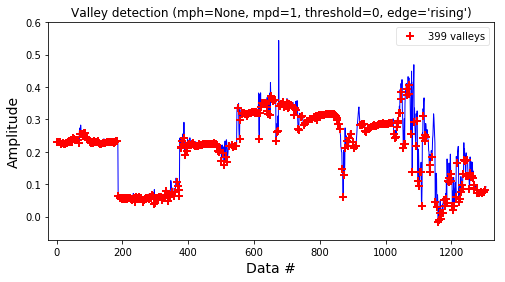

y_pca 0.005643062664934473


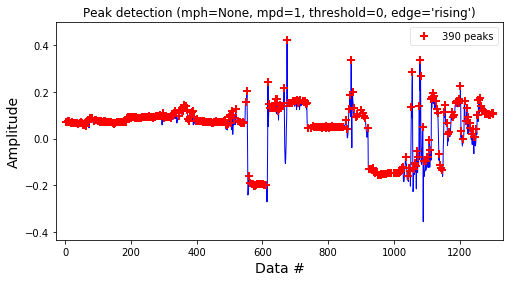

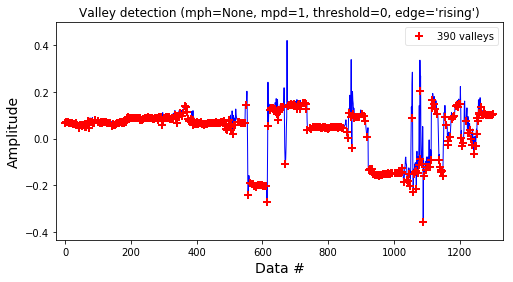

z_pca 0.006239612770290337
1002


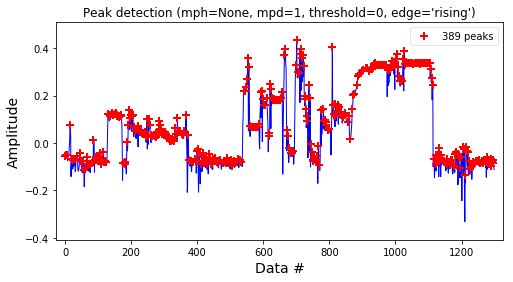

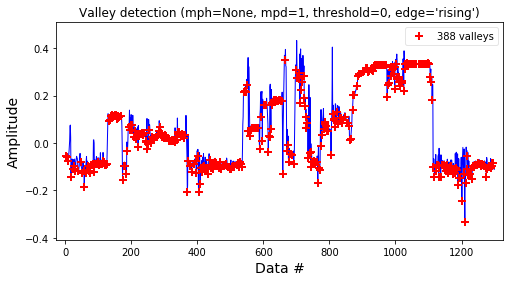

x_pca 0.017278642172423392


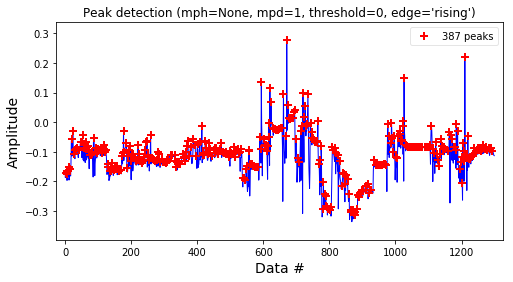

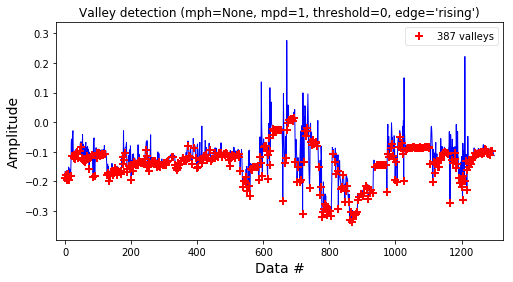

y_pca 0.01741806008811117


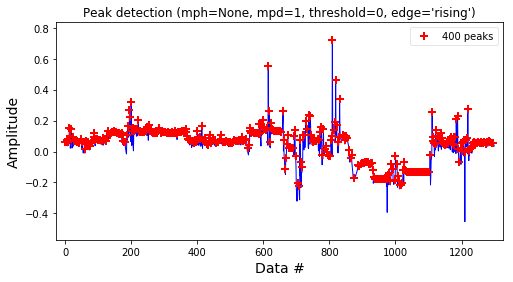

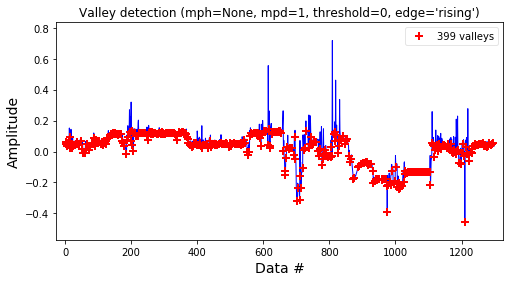

z_pca 0.017218035824788168
1003


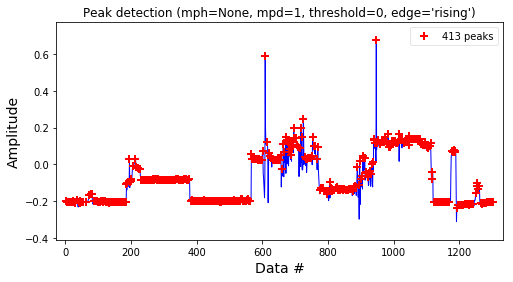

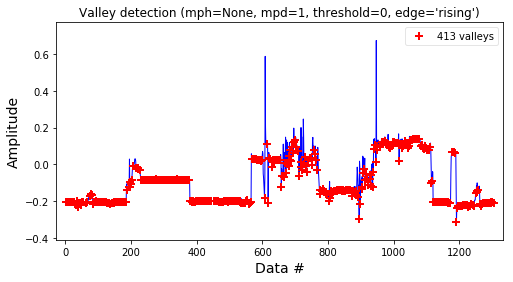

x_pca 0.0027612040603960247


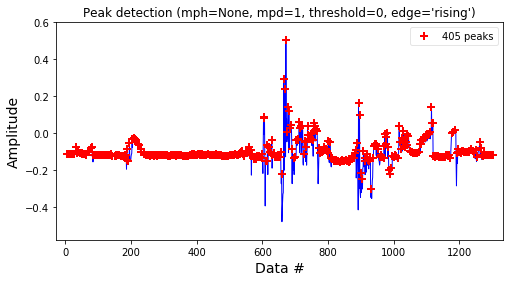

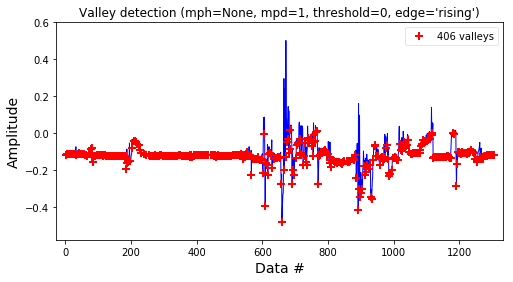

y_pca 0.005440012676456732


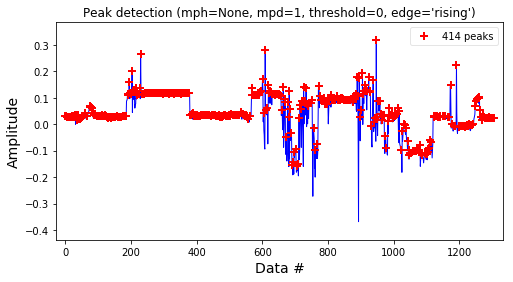

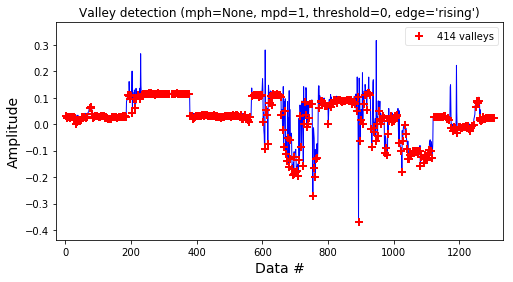

z_pca 0.004423468677755615
1004


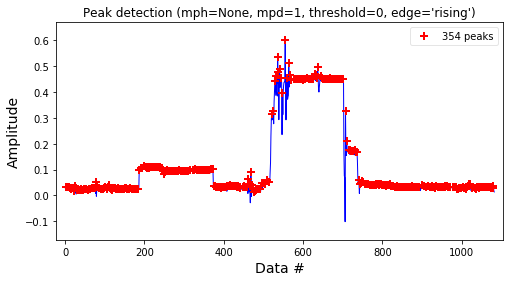

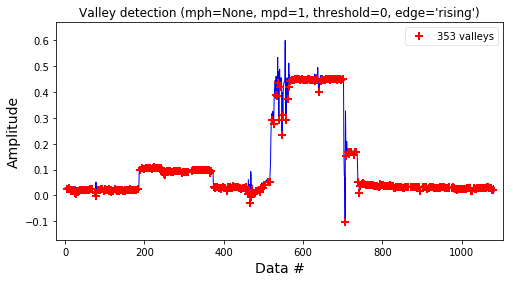

x_pca 0.002868801503675883


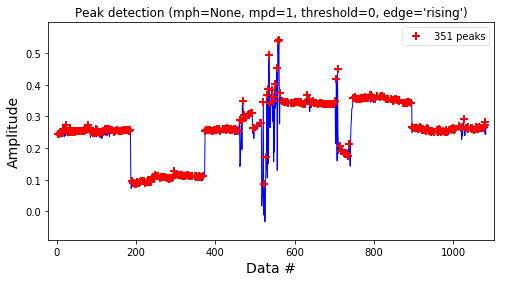

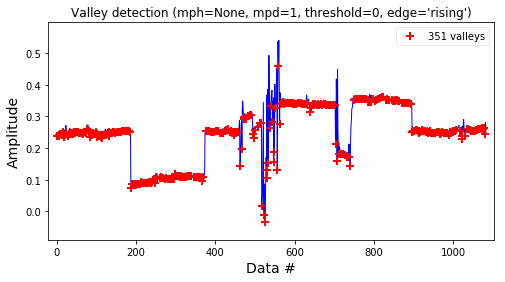

y_pca 0.0047510163644118725


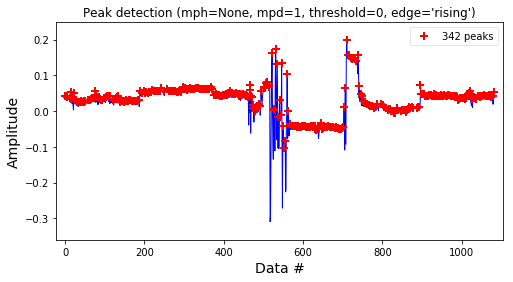

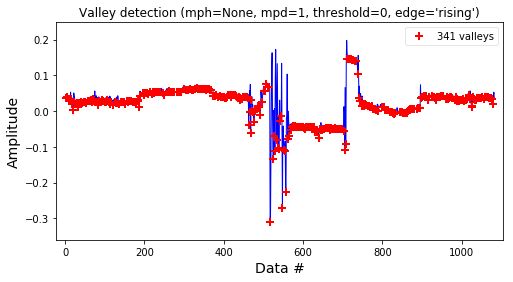

z_pca 0.0042142209980010024
1005


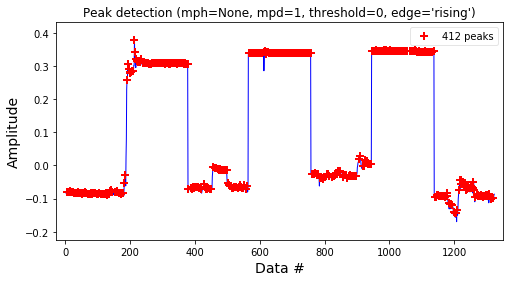

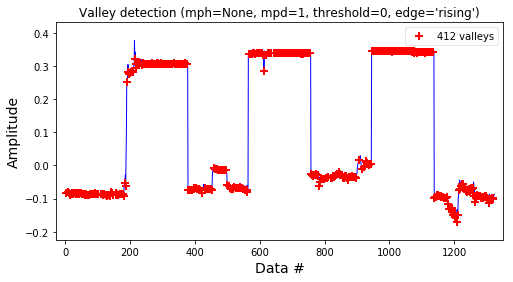

x_pca 0.0015115075512116757


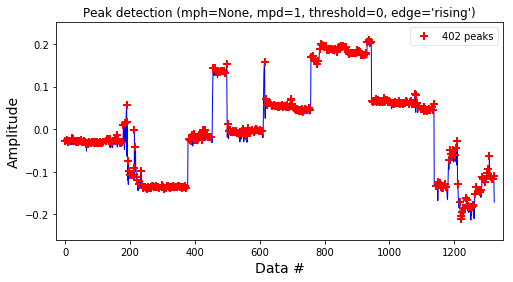

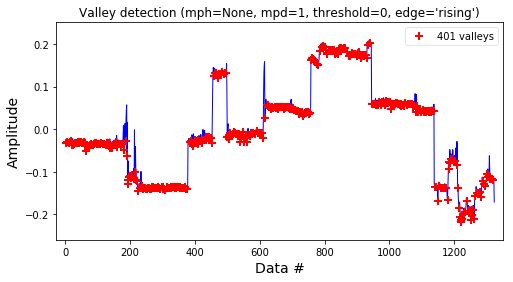

y_pca 0.0050336077448439424


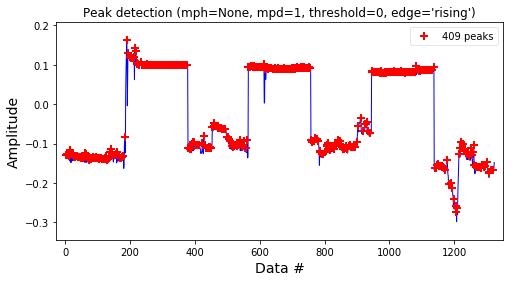

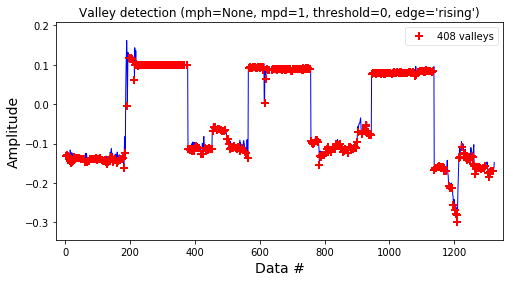

z_pca 0.0032576517049451165
1006


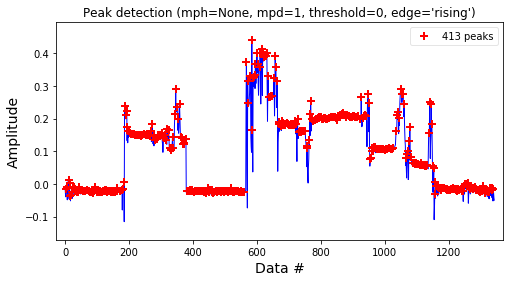

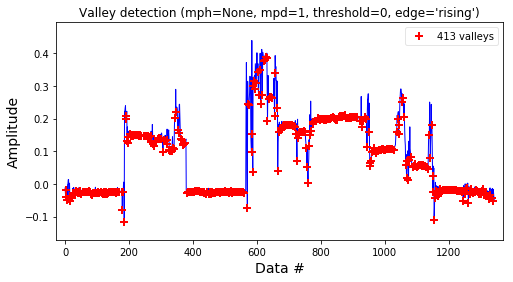

x_pca 0.004732195057520122


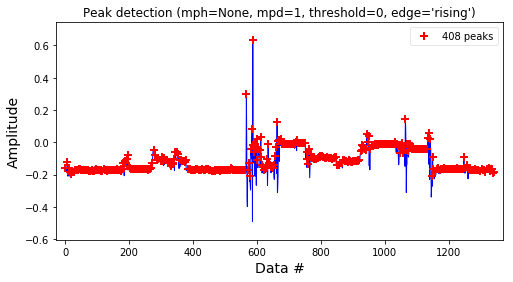

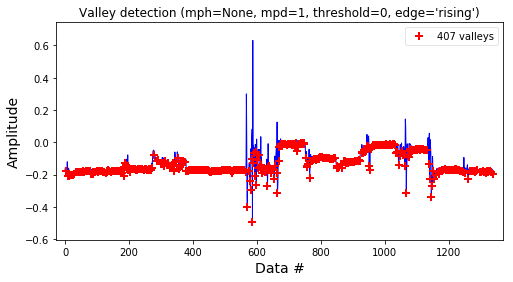

y_pca 0.006147246277992663


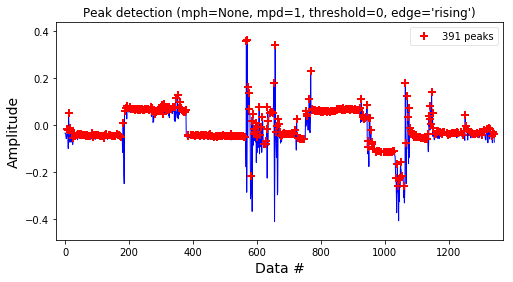

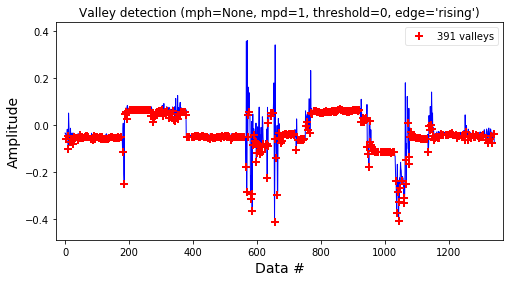

z_pca 0.007108935168003351
1007


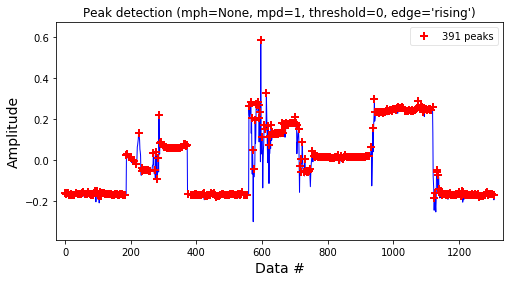

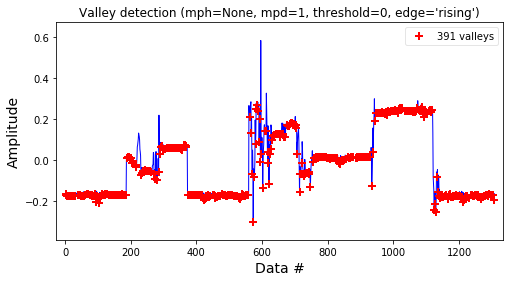

x_pca 0.004967991015615111


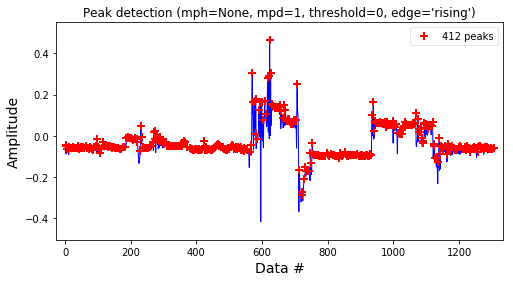

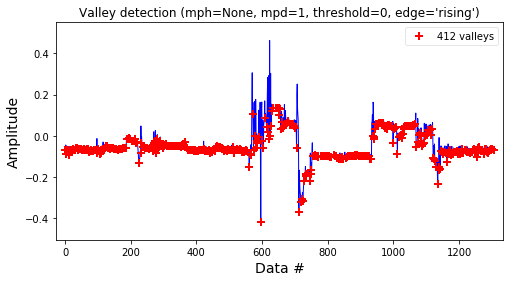

y_pca 0.00857858332884992


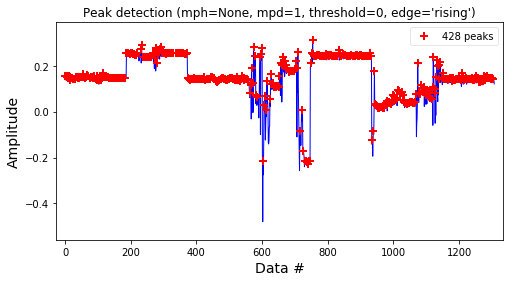

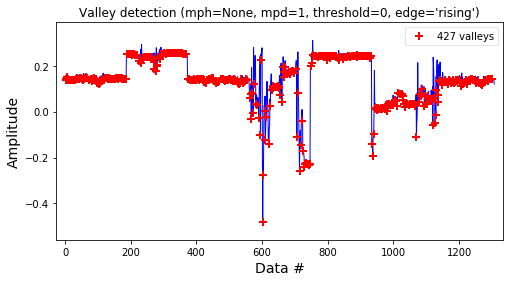

z_pca 0.005973919092516142
1008


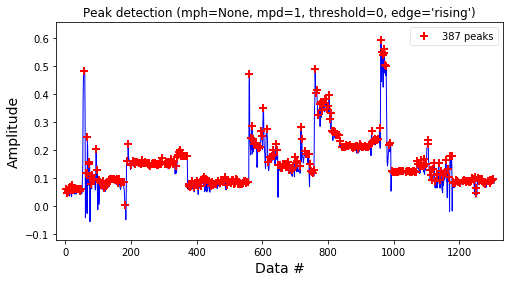

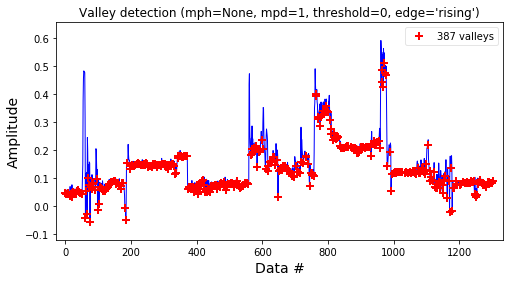

x_pca 0.01125333094587474


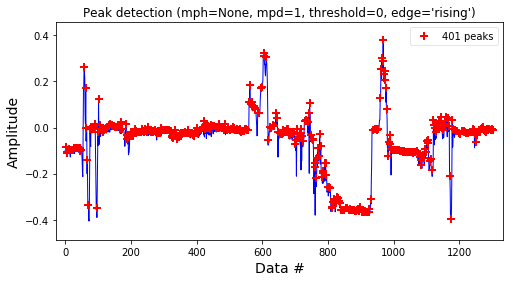

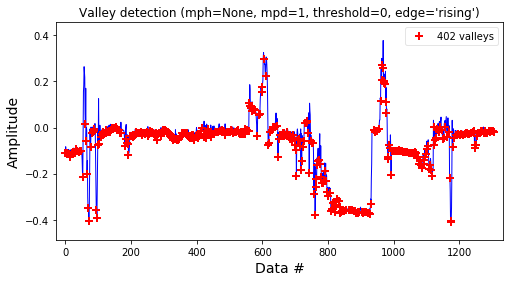

y_pca 0.013879680171755948


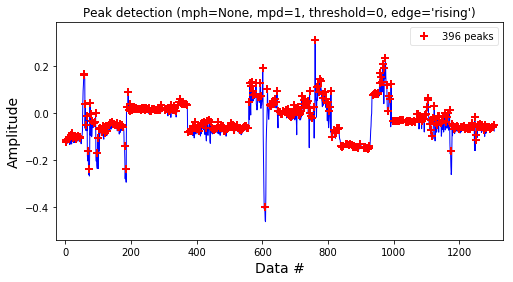

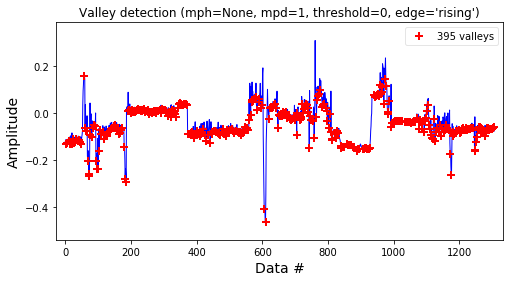

z_pca 0.014434986740247877
1009


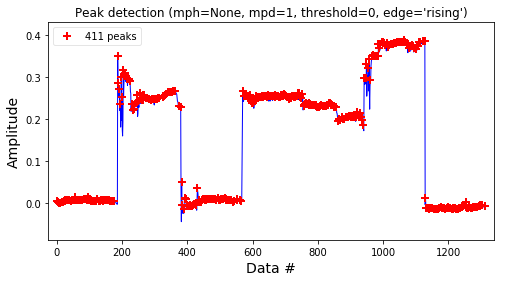

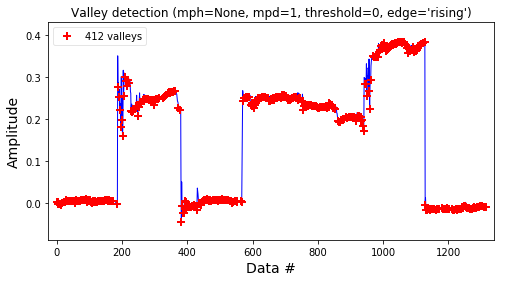

x_pca 0.0023800436063150885


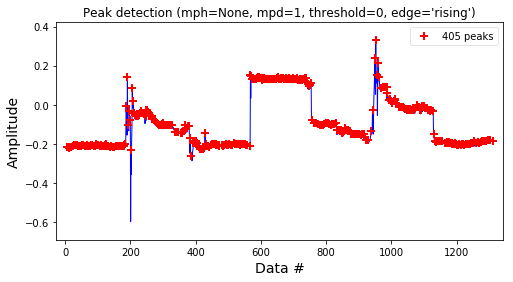

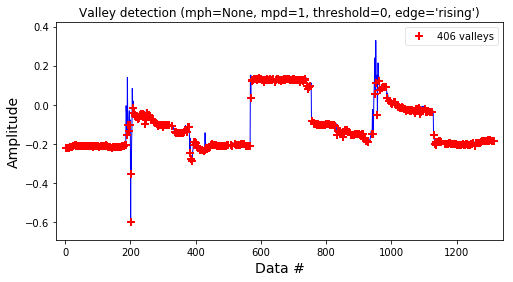

y_pca 0.003918638669936761


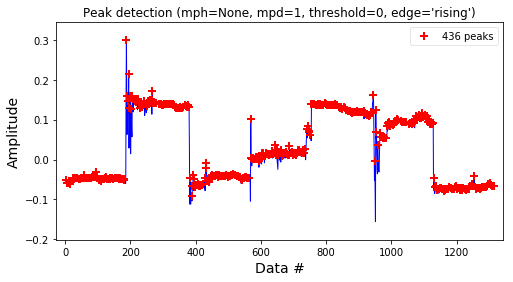

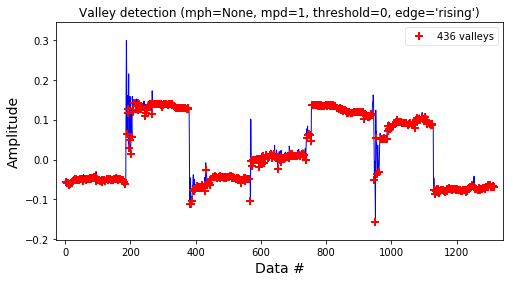

z_pca 0.0034427006456927145
1010


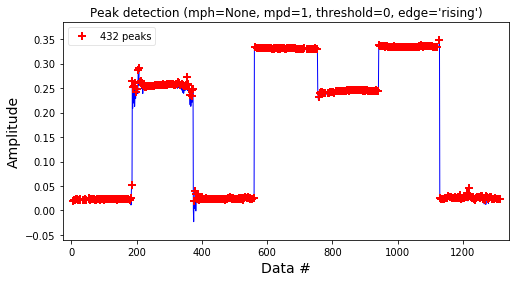

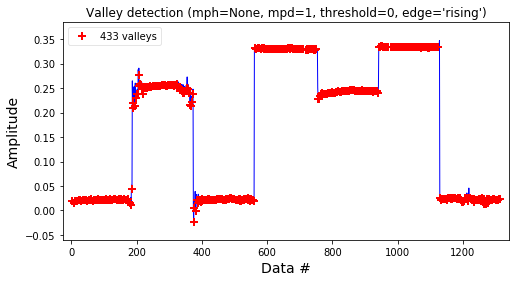

x_pca 0.0012035464880944258


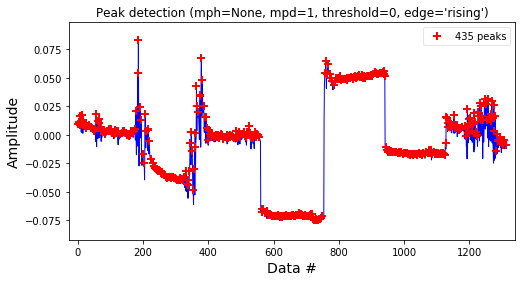

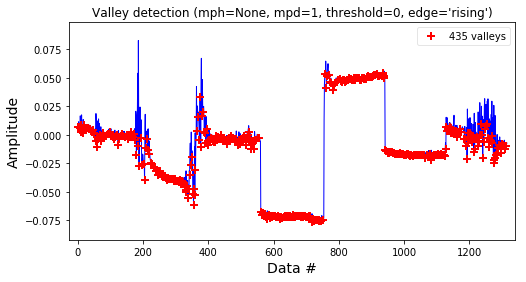

y_pca 0.0023373278054435614


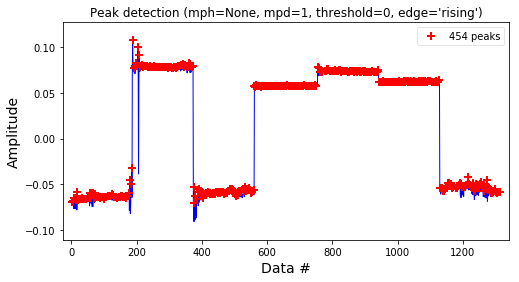

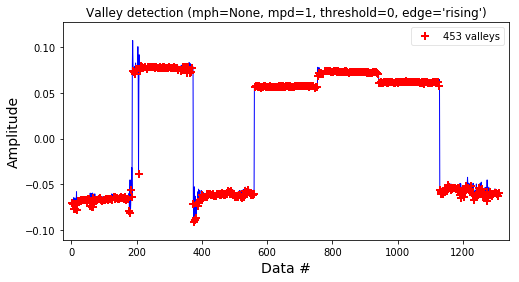

z_pca 0.0010709031450601807
1011


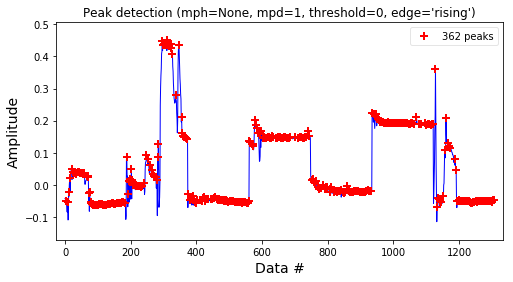

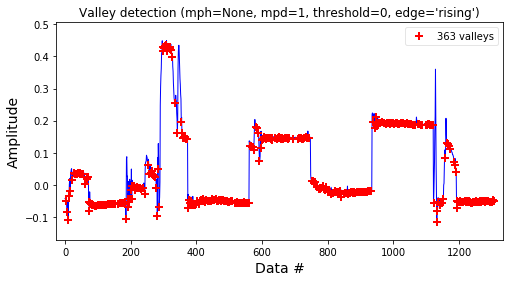

x_pca 0.0021916386045671976


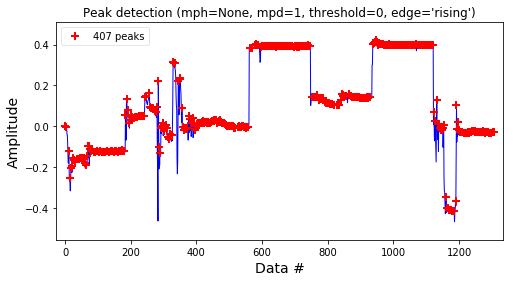

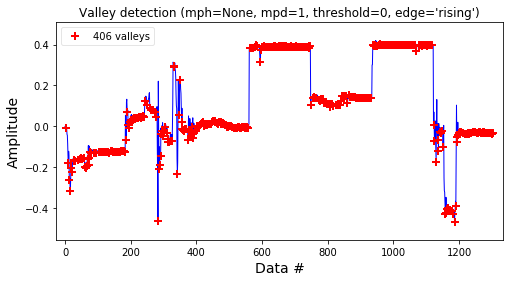

y_pca 0.0030837275453503704


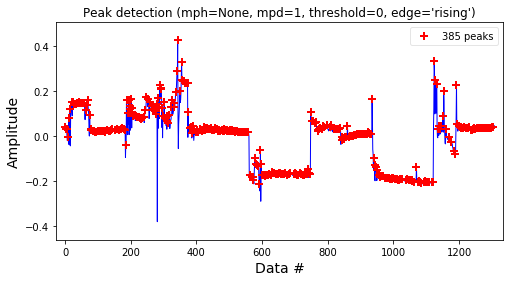

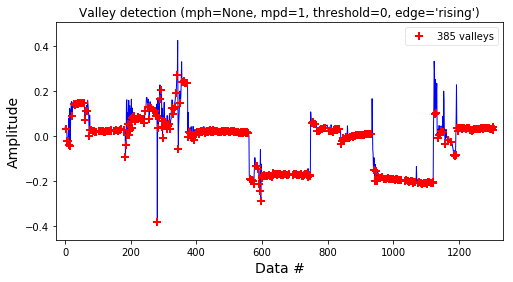

z_pca 0.004432315526020325
1012


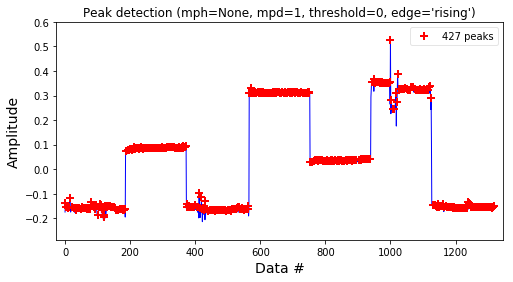

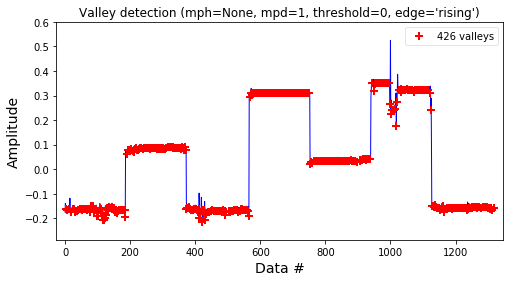

x_pca 0.0019648051273026823


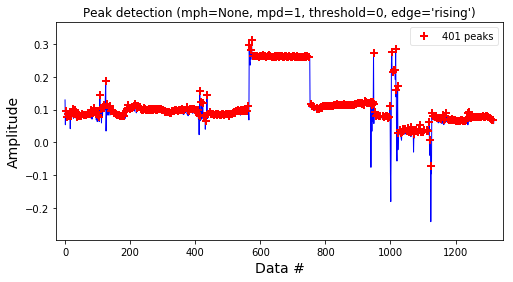

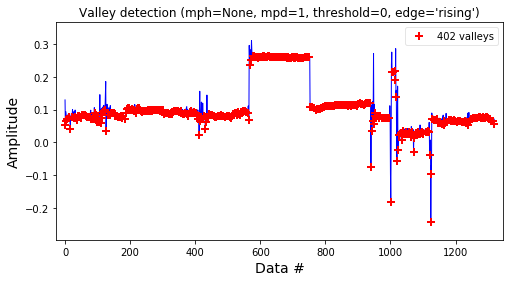

y_pca 0.003519028796145615


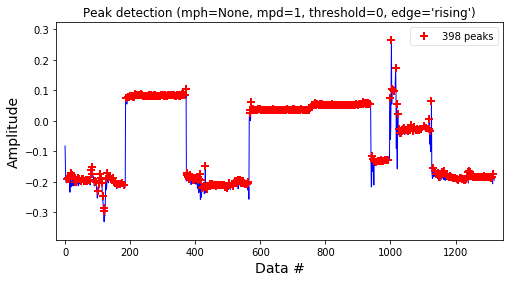

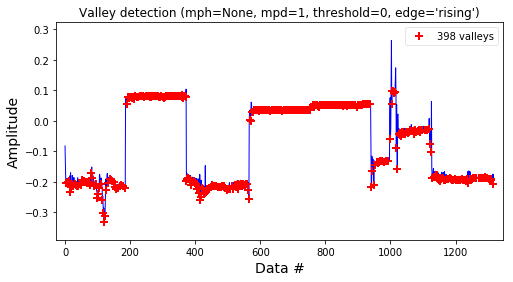

z_pca 0.003379268041419914
1013


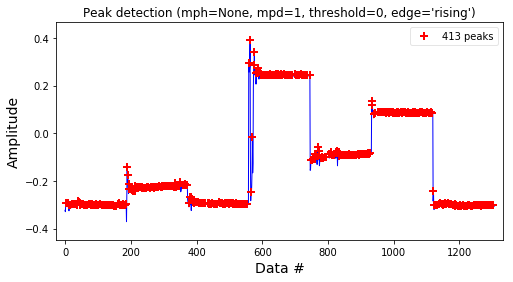

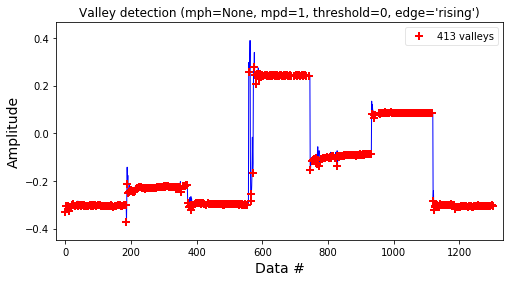

x_pca 0.0027850613845193245


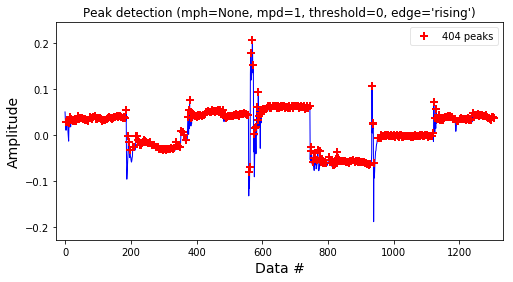

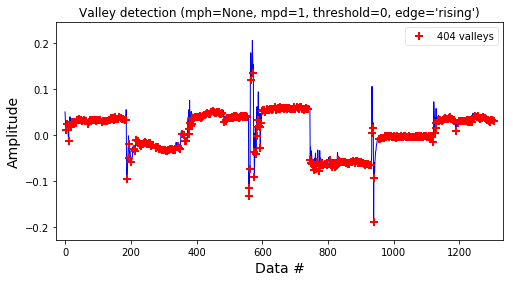

y_pca 0.0032873450905475665


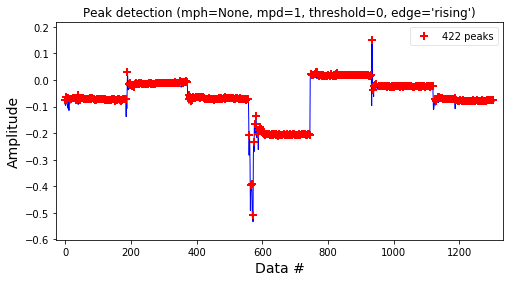

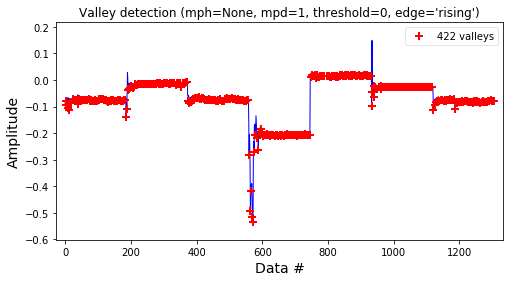

z_pca 0.0024186230918665404
1014


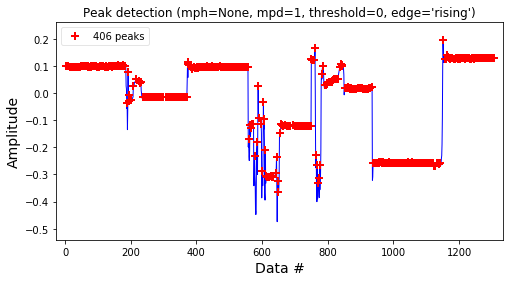

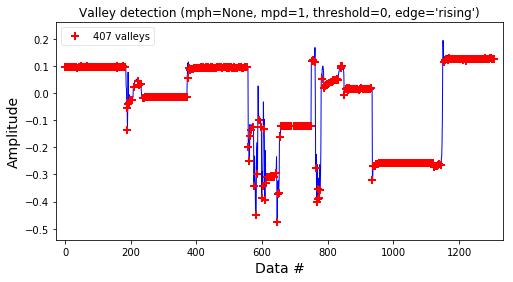

x_pca 0.0016086334233277322


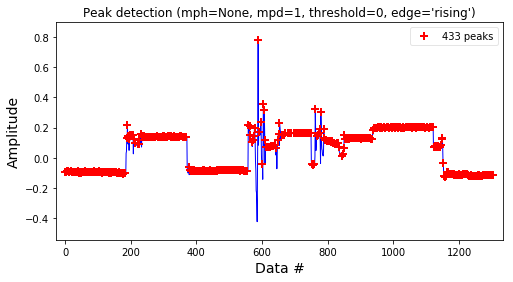

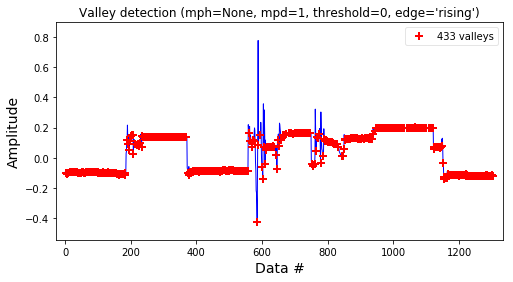

y_pca 0.0022655014345797156


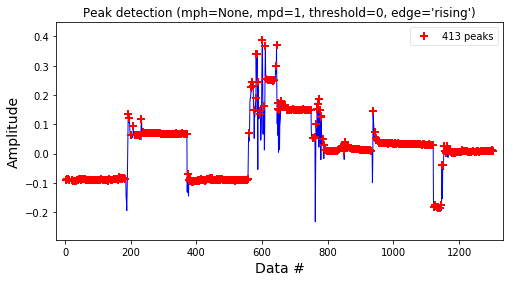

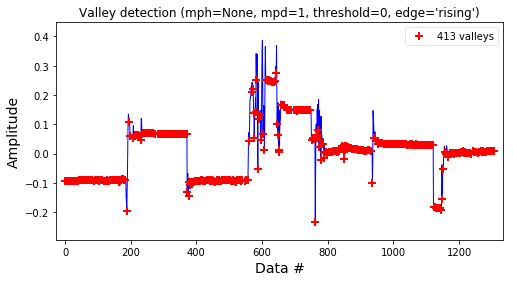

z_pca 0.0018331839802460947


In [65]:
cols = ['x_pca', 'y_pca', 'z_pca']
# cols = ['x','y','z']

all_avg_diff_nw = [[],[],[]]

for subj_i in all_subjects:
    df_nonwalk_i = df_nonwalk[df_nonwalk['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.median(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw[i].append(avg_diff_pv)
        
all_avg_diff_nw = np.array(all_avg_diff_nw)

In [70]:
aad_t = all_avg_diff.transpose()

print('walking for patients')
for i in range(len(aad_t)):
    print(all_subjects[i], aad_t[i])
    
min_diff_walk = np.apply_along_axis(np.mean, 0, aad_t)
print('min', min_diff_walk)
    
print()
print('non-walking for patients')

aad_nw_t = all_avg_diff_nw.transpose()

for i in range(len(aad_nw_t)):
    print(all_subjects[i], aad_nw_t[i])
    
max_diff_nonwalk = np.apply_along_axis(np.mean, 0, aad_nw_t)
print('max', max_diff_nonwalk)

walking for patients
1001 [0.06350933 0.05730742 0.05609579]
1002 [0.11451877 0.03751203 0.08658032]
1003 [0.08794737 0.03702669 0.05097686]
1004 [0.07411026 0.04184236 0.09787755]
1005 [0.10379613 0.11616535 0.22348857]
1006 [0.10682885 0.05525743 0.07422499]
1007 [0.0785878  0.02484255 0.06557958]
1008 [0.12652155 0.09156752 0.19978853]
1009 [0.10976938 0.05117576 0.09187727]
1010 [0.10769275 0.03675516 0.06404077]
1011 [0.06576493 0.05761658 0.07600569]
1012 [0.07857734 0.05336415 0.08588149]
1013 [0.07537202 0.03402884 0.05756881]
1014 [0.08860739 0.05267868 0.06230594]
min [0.09154313 0.05336718 0.09230658]

non-walking for patients
1001 [0.00391407 0.00564306 0.00623961]
1002 [0.01727864 0.01741806 0.01721804]
1003 [0.0027612  0.00544001 0.00442347]
1004 [0.0028688  0.00475102 0.00421422]
1005 [0.00151151 0.00503361 0.00325765]
1006 [0.0047322  0.00614725 0.00710894]
1007 [0.00496799 0.00857858 0.00597392]
1008 [0.01125333 0.01387968 0.01443499]
1009 [0.00238004 0.00391864 0.0034

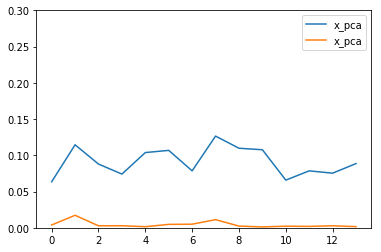

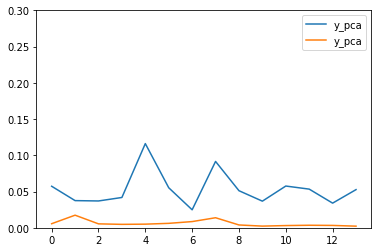

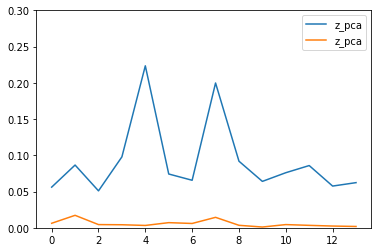

In [71]:
for i in range(3):
    plt.plot(np.transpose(aad_t)[i], label=cols[i])
    plt.plot(np.transpose(aad_nw_t)[i], label=cols[i])
    plt.ylim((0,0.3))
    plt.legend()
    plt.show()

# for i in range(3):
#     plt.plot(np.transpose(aad_nw_t)[i], label=cols[i])
#     plt.ylim((0,0.3))
#     plt.legend()
# plt.show()

In [68]:
aad_t = all_avg_diff.transpose()

print('walking for normal people')
for i in range(len(aad_t)):
    print(all_subjects[i], aad_t[i])
    
min_diff_walk = np.apply_along_axis(np.min, 0, aad_t)
print('min', min_diff_walk)
    
print()
print('non-walking for normal people')

aad_nw_t = all_avg_diff_nw.transpose()

for i in range(len(aad_nw_t)):
    print(all_subjects[i], aad_nw_t[i])
    
max_diff_nonwalk = np.apply_along_axis(np.max, 0, aad_nw_t)
print('max', max_diff_nonwalk)

walking for normal people
1001 [0.06350933 0.05730742 0.05609579]
1002 [0.11451877 0.03751203 0.08658032]
1003 [0.08794737 0.03702669 0.05097686]
1004 [0.07411026 0.04184236 0.09787755]
1005 [0.10379613 0.11616535 0.22348857]
1006 [0.10682885 0.05525743 0.07422499]
1007 [0.0785878  0.02484255 0.06557958]
1008 [0.12652155 0.09156752 0.19978853]
1009 [0.10976938 0.05117576 0.09187727]
1010 [0.10769275 0.03675516 0.06404077]
1011 [0.06576493 0.05761658 0.07600569]
1012 [0.07857734 0.05336415 0.08588149]
1013 [0.07537202 0.03402884 0.05756881]
1014 [0.08860739 0.05267868 0.06230594]
min [0.06350933 0.02484255 0.05097686]

non-walking for normal people
1001 [0.00391407 0.00564306 0.00623961]
1002 [0.01727864 0.01741806 0.01721804]
1003 [0.0027612  0.00544001 0.00442347]
1004 [0.0028688  0.00475102 0.00421422]
1005 [0.00151151 0.00503361 0.00325765]
1006 [0.0047322  0.00614725 0.00710894]
1007 [0.00496799 0.00857858 0.00597392]
1008 [0.01125333 0.01387968 0.01443499]
1009 [0.00238004 0.00391

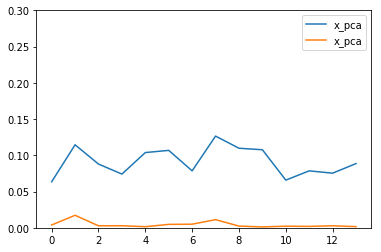

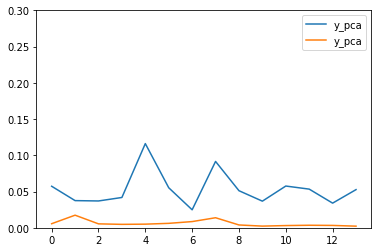

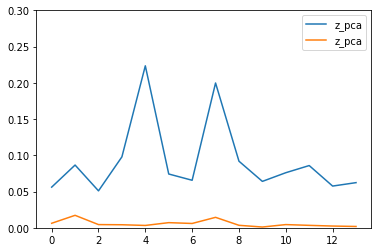

In [69]:
for i in range(3):
    plt.plot(np.transpose(aad_t)[i], label=cols[i])
    plt.plot(np.transpose(aad_nw_t)[i], label=cols[i])
    plt.ylim((0,0.3))
    plt.legend()
    plt.show()

# for i in range(3):
#     plt.plot(np.transpose(aad_nw_t)[i], label=cols[i])
#     plt.ylim((0,0.3))
#     plt.legend()
# plt.show()

In [52]:
three_sec = 60   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

# cols = ['x_pca', 'y_pca', 'z_pca']
cols = ['x','y','z']
threshold = [0.05, 0.035, 0.04]

exceed_thres = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk)-three_sec):
        df_walk_i = [df_walk.loc[j, c] for j in range(i,i+three_sec)]
#         print(len(df_walk_i))
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres[cl].append(exceed)

In [53]:
three_sec = 60   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

# cols = ['x_pca', 'y_pca', 'z_pca']
cols = ['x','y','z']
threshold = [0.05, 0.035, 0.04]

exceed_thres_nw = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk)-three_sec):
        df_nonwalk_i = [df_nonwalk.loc[j, c] for j in range(i,i+three_sec)]
        
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres_nw[cl].append(exceed)

In [54]:
import seaborn as sns

walk (patients)


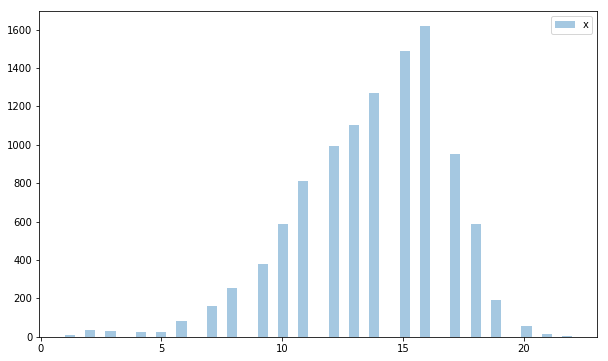

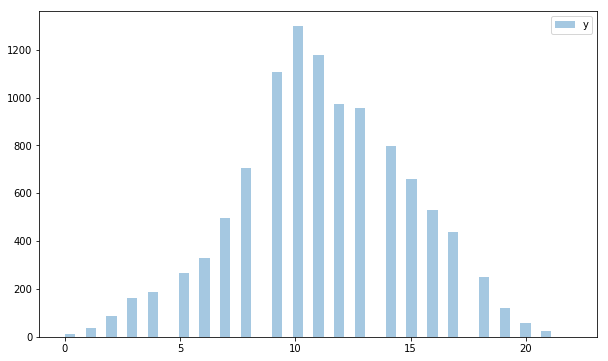

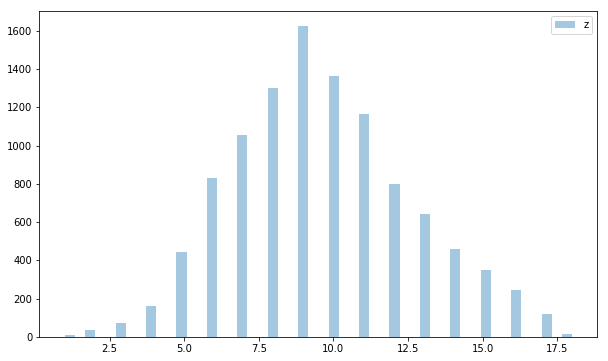

In [55]:
print('walk (patients)')
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

non-walk (patients)


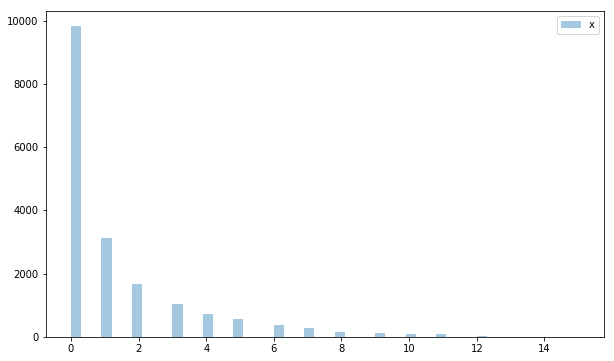

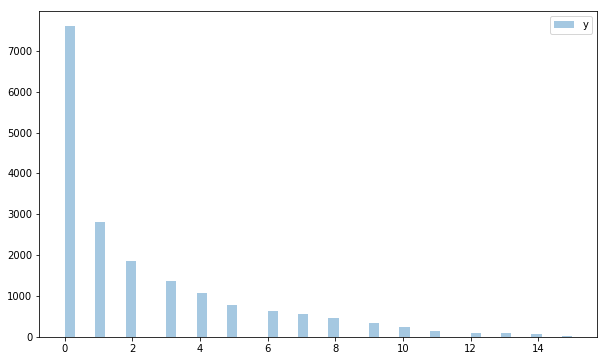

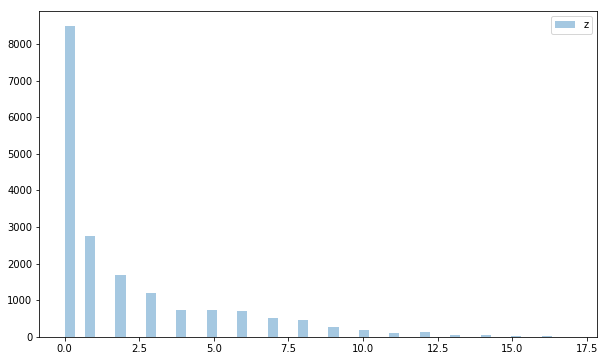

In [56]:
print('non-walk (patients)')
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_nw[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
#     ax.set_ylim(0,200)

## Normal People

In [57]:
X_dict_1 = {
    'id': subj_all,
    'x': [X_i[0] for X_i in X_all],
    'y': [X_i[1] for X_i in X_all],
    'z': [X_i[2] for X_i in X_all],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca],
#     'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca],
#     'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca],
#     'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca],
    'label': y_all
}

df_rpy_1 = pd.DataFrame(X_dict_1)

NameError: name 'subj_all' is not defined

In [ ]:
df_rpy_1

In [ ]:
df_walk_1 = df_rpy_1[df_rpy_1['label']==label_dict['walk']]
df_walk_1 = df_walk_1.reset_index(drop=True)

In [ ]:
df_nonwalk_1 = df_rpy_1[df_rpy_1['label']!=label_dict['walk']]
df_nonwalk_1 = df_nonwalk_1.reset_index(drop=True)

In [ ]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_1 = [[],[],[]]

for subj_i in all_subjects:
    df_walk_i = df_walk_1[df_walk_1['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_1[i].append(avg_diff_pv)
        
all_avg_diff_1 = np.array(all_avg_diff_1)

In [ ]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_nw_1 = [[],[],[]]

for subj_i in all_subjects:
    df_nonwalk_i = df_nonwalk_1[df_nonwalk_1['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw_1[i].append(avg_diff_pv)
        
all_avg_diff_nw_1 = np.array(all_avg_diff_nw_1)

In [ ]:
aad_t_1 = all_avg_diff_1.transpose()

print('walking for normal people')
for i in range(len(aad_t_1)):
    print(all_subjects[i], aad_t_1[i])
    
aad_t_nw_1 = all_avg_diff_nw_1.transpose()

print()
print('non-walking for normal people')
for i in range(len(aad_t_nw_1)):
    print(all_subjects[i], aad_t_nw_1[i])

In [ ]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk_1)-three_sec, one_sec):
        df_walk_i = [df_walk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_1[cl].append(exceed)

In [54]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_nw_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk_1)-three_sec, one_sec):
        df_nonwalk_i = [df_nonwalk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_nw_1[cl].append(exceed)

E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


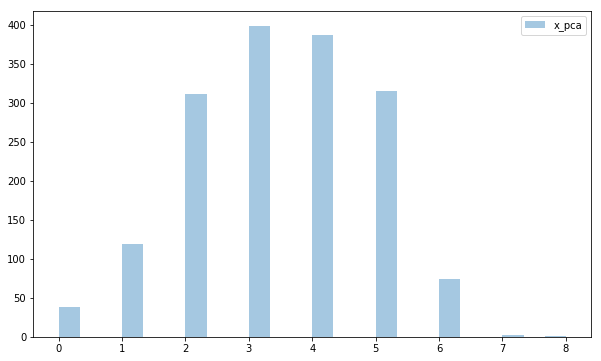

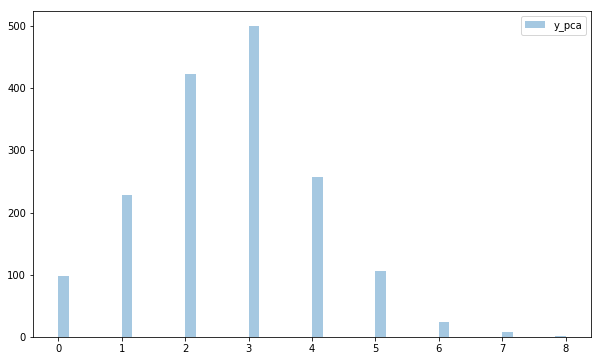

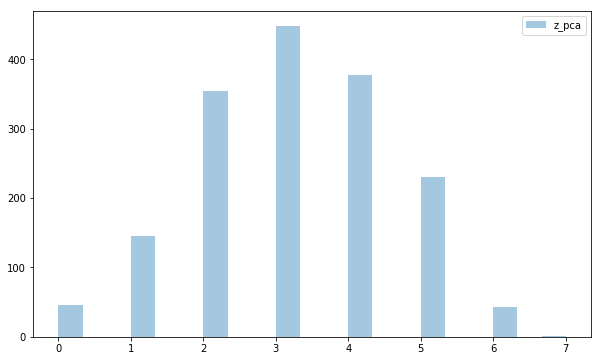

In [55]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


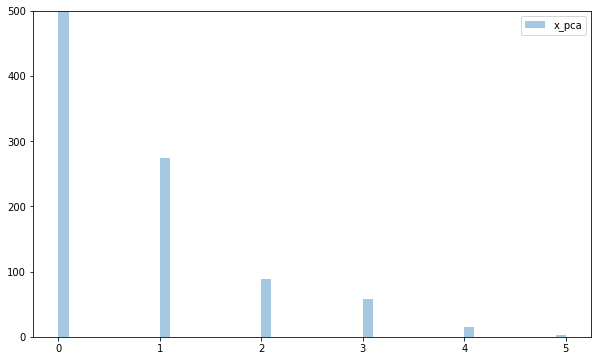

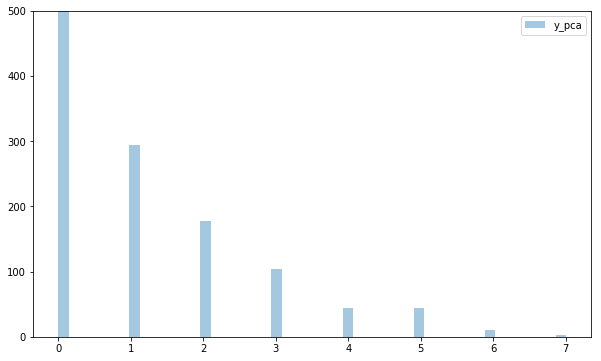

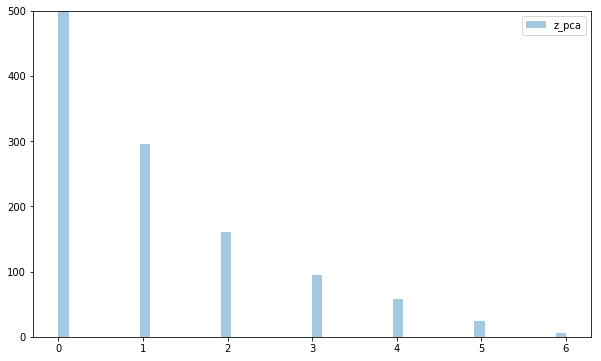

In [56]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_nw_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
    ax.set_ylim(0,500)

# K-Nearest Neighbors

In [57]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [58]:
filename = basepath + 'model/knn_model.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [59]:
y_pred = nn_model.predict(X_test)

In [60]:
nn_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [61]:
y_pred_2 = nn_model_2.predict(X_te)

## Evaluation

In [62]:
%run eval_score.ipynb

In [63]:
LABELS = ['sit','sleep','stand','walk']

0.865414710485133


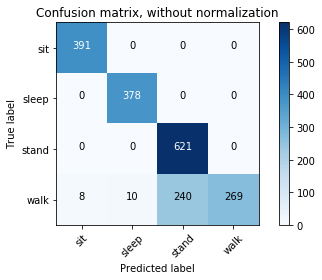

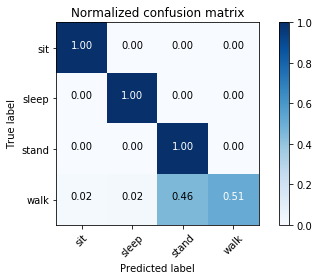

              precision    recall  f1-score   support

         sit       0.98      1.00      0.99       391
       sleep       0.97      1.00      0.99       378
       stand       0.72      1.00      0.84       621
        walk       1.00      0.51      0.68       527

   micro avg       0.87      0.87      0.87      1917
   macro avg       0.92      0.88      0.87      1917
weighted avg       0.90      0.87      0.85      1917



In [64]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

0.8628884826325411


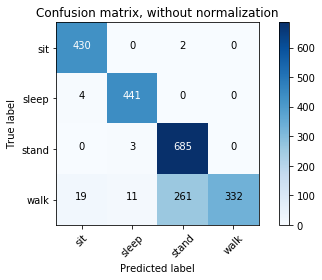

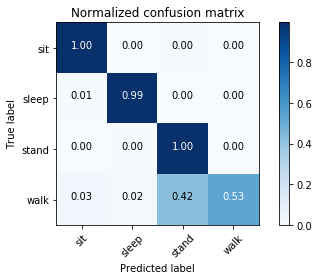

              precision    recall  f1-score   support

         sit       0.95      1.00      0.97       432
       sleep       0.97      0.99      0.98       445
       stand       0.72      1.00      0.84       688
        walk       1.00      0.53      0.70       623

   micro avg       0.86      0.86      0.86      2188
   macro avg       0.91      0.88      0.87      2188
weighted avg       0.90      0.86      0.85      2188



In [65]:
acc = accuracy_score(y_te, y_pred_2)
print(acc)

show_conf_matrix(y_te, y_pred_2, LABELS)
show_clf_report(y_te, y_pred_2, LABELS)

# Walk Algorithm

In [66]:
%run classifier_alg.ipynb

In [67]:
cols = ['x_pca', 'y_pca', 'z_pca']

df_pca = df_rpy[cols]     # patients
df_pca_1 = df_rpy_1[cols] # normal_people

In [68]:
xyz_pca = np.array(df_pca.to_dict(orient='split')['data'])
dummy_y = np.array([-1 for i in range(len(xyz_pca))])

In [69]:
xyz_pca, y_temp = make_overlapping(xyz_pca, dummy_y)

In [70]:
xyz_pca.shape, df_pca.shape

((10939, 60, 3), (10998, 3))

In [80]:
walk_pred = classify_walk_2(xyz_pca)
walk_pred = np.array(walk_pred)

In [81]:
walk_pred

array([0, 0, 0, ..., 3, 3, 3])

In [82]:
walk_pred = np.array(walk_pred)

walk_pred.shape

(10939,)

In [83]:
walk_actual = np.array([3 if (df_rpy.loc[i, 'label']==3) else 0 for i in range(len(df_rpy))])

walk_actual.shape

(10998,)

In [84]:
print(walk_actual)

[0 0 0 ... 3 3 3]


## Walk Algorithm Evaluation

In [85]:
walk_lbl = ['NaN','walk']

0.8999908583965628


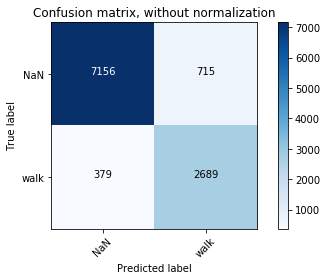

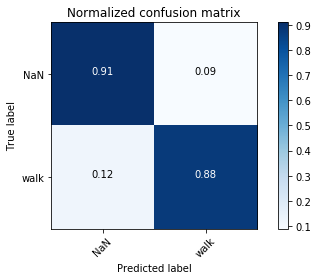

              precision    recall  f1-score   support

         NaN       0.95      0.91      0.93      7871
        walk       0.79      0.88      0.83      3068

   micro avg       0.90      0.90      0.90     10939
   macro avg       0.87      0.89      0.88     10939
weighted avg       0.90      0.90      0.90     10939



In [86]:
acc = accuracy_score(walk_actual[:walk_pred.shape[0]], walk_pred)
print(acc)

show_conf_matrix(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)
show_clf_report(walk_actual[:walk_pred.shape[0]], walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [87]:
X_test_new = get_inverse_X(X_test)

X_test_new

array([[[ 0.96,  0.02,  0.13],
        [ 0.87,  0.02,  0.19],
        [ 0.84, -0.05,  0.19],
        ...,
        [ 1.11,  0.13,  0.23],
        [ 0.91, -0.06,  0.21],
        [ 0.88, -0.05,  0.24]],

       [[-0.55, -0.61,  0.45],
        [-0.54, -0.61,  0.45],
        [-0.55, -0.61,  0.45],
        ...,
        [-0.54, -0.61,  0.45],
        [-0.54, -0.61,  0.45],
        [-0.54, -0.61,  0.45]],

       [[-0.92, -0.13,  0.  ],
        [-0.81, -0.14,  0.02],
        [-1.17, -0.28, -0.  ],
        ...,
        [-1.07, -0.28, -0.07],
        [-0.73, -0.09, -0.05],
        [-0.83, -0.13, -0.03]],

       ...,

       [[-0.19,  0.85, -0.41],
        [-0.19,  0.85, -0.41],
        [-0.19,  0.85, -0.41],
        ...,
        [-0.2 ,  0.85, -0.41],
        [-0.2 ,  0.85, -0.41],
        [-0.2 ,  0.85, -0.41]],

       [[-1.04, -0.22, -0.08],
        [-0.9 , -0.15, -0.05],
        [-0.92, -0.2 , -0.04],
        ...,
        [-1.01, -0.18,  0.01],
        [-0.96, -0.22, -0.01],
        [-0.92,

In [88]:
walk_pred = classify_walk_2(X_test_new)

In [89]:
print(walk_pred)

[3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 

In [90]:
y_pred_new = combine_2(X_test_new, y_pred)

In [91]:
print(y_pred_new)

[3, 1, 3, 2, 2, 3, 1, 3, 3, 1, 1, 3, 3, 1, 0, 2, 0, 1, 2, 2, 0, 1, 3, 2, 1, 3, 0, 1, 2, 2, 1, 3, 2, 1, 2, 0, 0, 3, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 1, 1, 2, 2, 0, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 0, 1, 1, 2, 2, 3, 1, 3, 0, 1, 3, 3, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 3, 0, 2, 1, 3, 0, 3, 3, 2, 3, 2, 0, 3, 1, 1, 0, 3, 3, 2, 1, 2, 0, 2, 3, 2, 0, 0, 2, 0, 0, 3, 2, 1, 2, 0, 2, 2, 3, 2, 1, 3, 2, 2, 3, 2, 1, 3, 0, 1, 0, 2, 0, 3, 3, 3, 2, 3, 0, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 3, 0, 1, 2, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 3, 0, 3, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 3, 2, 0, 2, 1, 1, 0, 3, 1, 1, 3, 2, 3, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 3, 2, 3, 3, 2, 1, 3, 1, 0, 1, 1, 1, 2, 3, 0, 0, 3, 2, 0, 3, 3, 3, 2, 0, 3, 0, 3, 2, 3, 1, 3, 2, 3, 3, 2, 3, 0, 1, 0, 2, 1, 1, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 2, 1, 3, 2, 1, 3, 0, 3, 1, 2, 2, 3, 0, 1, 2, 3, 2, 2, 0, 0, 0, 2, 

0.9379238393322901


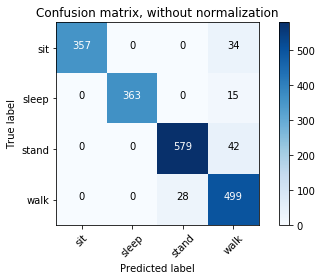

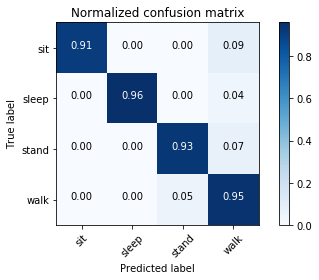

              precision    recall  f1-score   support

         sit       1.00      0.91      0.95       391
       sleep       1.00      0.96      0.98       378
       stand       0.95      0.93      0.94       621
        walk       0.85      0.95      0.89       527

   micro avg       0.94      0.94      0.94      1917
   macro avg       0.95      0.94      0.94      1917
weighted avg       0.94      0.94      0.94      1917



In [92]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [93]:
%run test_model.ipynb

In [94]:
filename = basepath + 'model/knn_model.pkl'

model = pickle.load(open(filename,'rb'))

In [95]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

call_functions(all_subjects, pca)

Loading 1001's data


KeyboardInterrupt: 

Loading 3001's data
Finished prediction


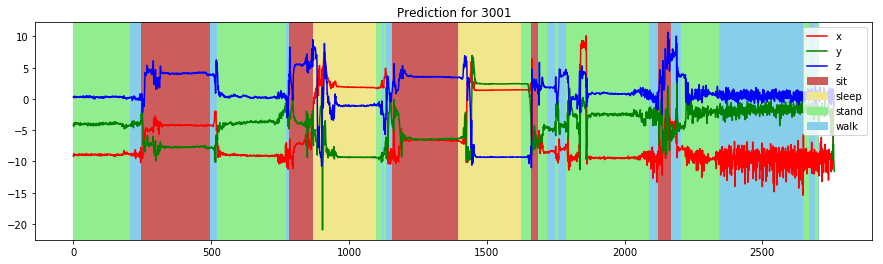

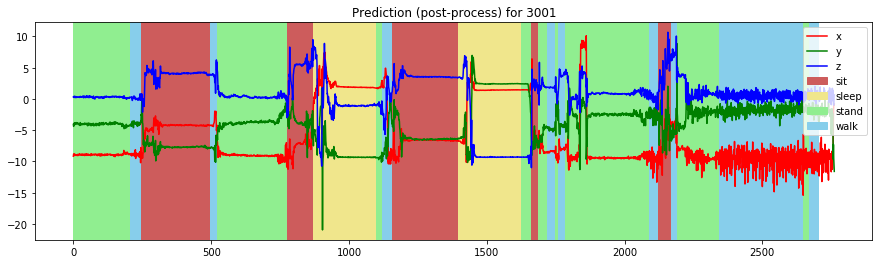

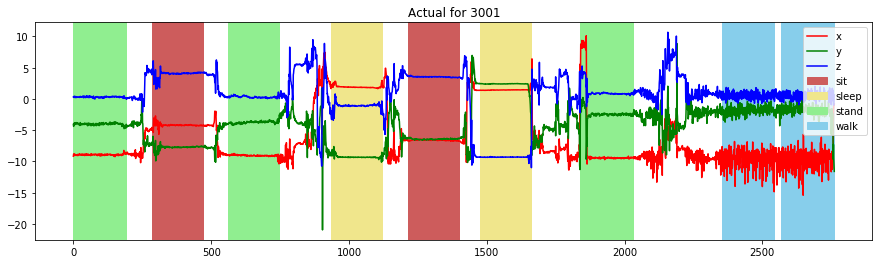

Loading 3002's data
Finished prediction


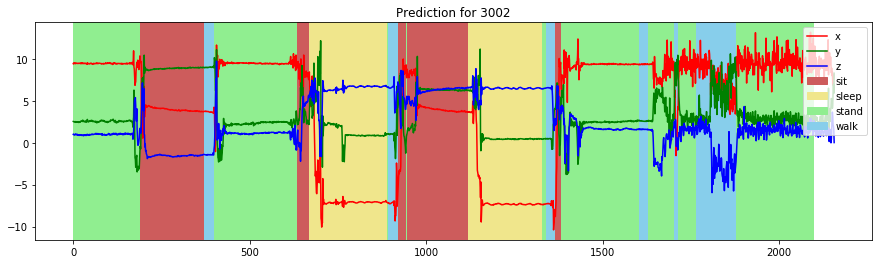

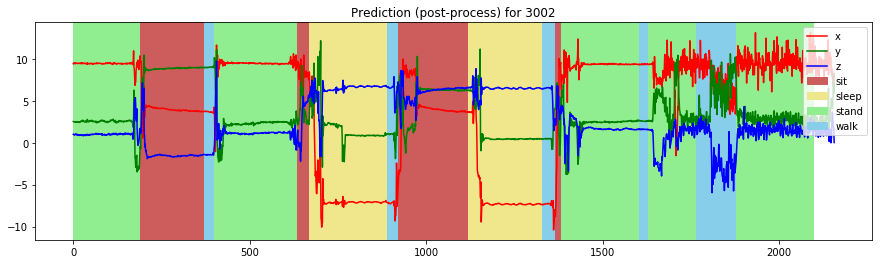

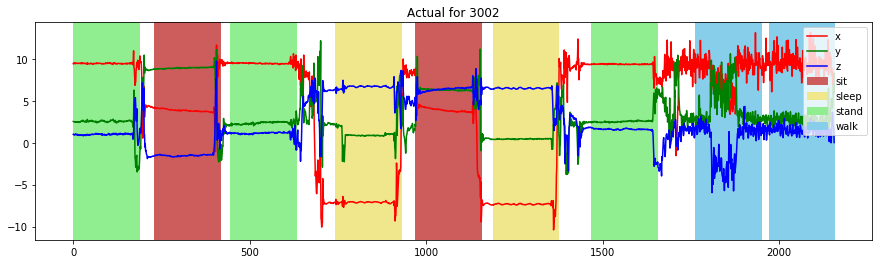

Loading 3003's data
Finished prediction


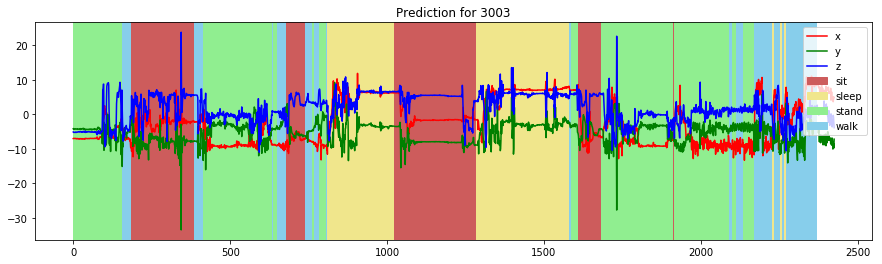

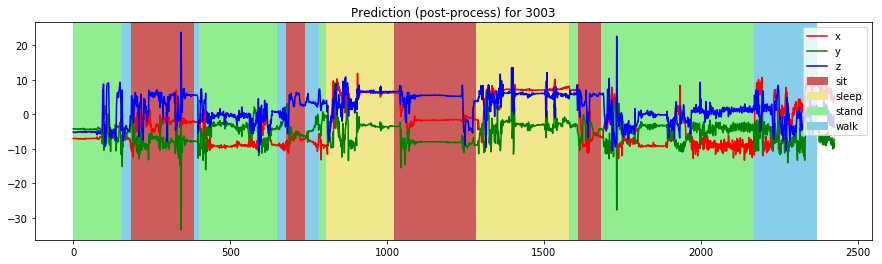

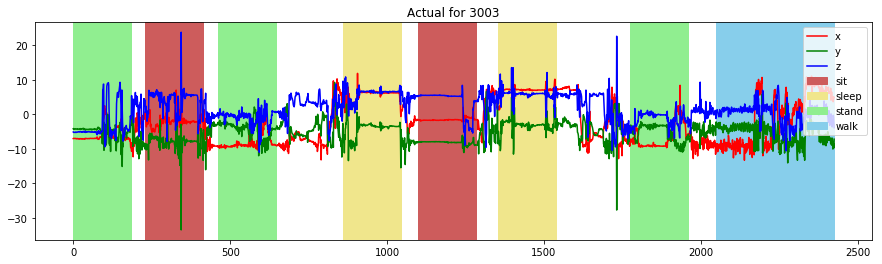

Loading 3004's data
Finished prediction


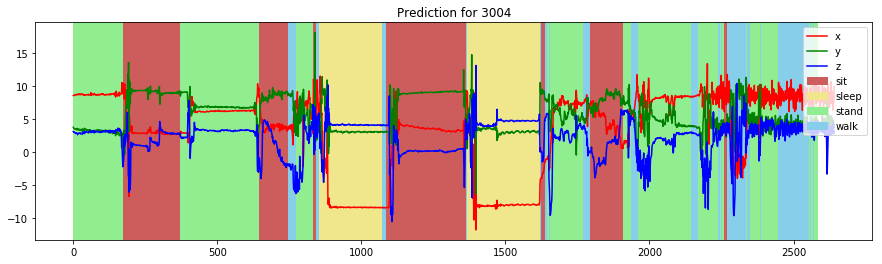

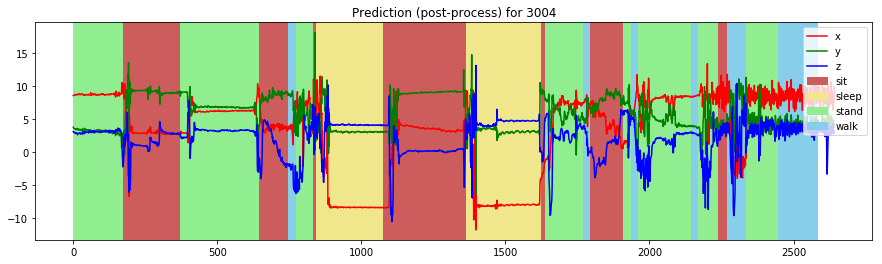

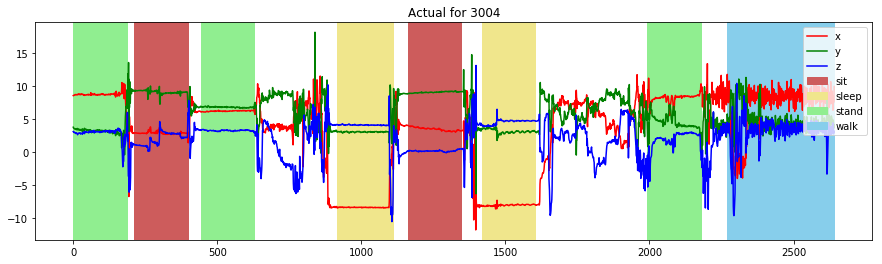

Loading 3005's data


In [ ]:
all_subjects = [str(i) for i in range(3001,3006)]

call_functions(all_subjects, pca_p)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca_p)
X_vis_imp = pd.DataFrame(X_vis_imp)

df_y = predict_combine(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

In [ ]:
cols = ['x','y','z']
df_test[cols]

In [ ]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
# show_clf_report(actual_y, pred_y, LABELS)

labels_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, labels_list, output_dict=True)
print(report['macro avg'])

In [ ]:
df_test['x'][2200:].plot()

plt.show()

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()